In [1]:
import re
import json 
import csv
from io import StringIO
#from bs4 import BeautifulSoup
import requests
import nasdaqdatalink


In [2]:
#! pip install --user Nasdaq-Data-Link

In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

mpl.rcParams['figure.figsize']= (8,6)
mpl.rcParams['axes.grid']= True

In [4]:
headers= {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.53 Safari/537.36 Edg/103.0.1264.37'}

In [5]:
stock_url= 'https://query1.finance.yahoo.com/v7/finance/download/{}?'
params= {
    'period1': '1626005165',
    'period2' :'1657541165',
    'interval': '1d',
    'events' : 'history',
    'includeAdjustedClose': 'true'
}

In [6]:
params= {
    'range': '4y',
    'interval': '1d',
    'events' : 'history'
}

In [7]:
stock = '2222.SR'

In [8]:
response= requests.get(stock_url.format(stock), params=params, headers=headers)

ConnectionError: HTTPSConnectionPool(host='query1.finance.yahoo.com', port=443): Max retries exceeded with url: /v7/finance/download/2222.SR?range=4y&interval=1d&events=history (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000197A3F95F88>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
response.text

In [ ]:
file= StringIO(response.text)
reader=csv.reader(file)
data=list(reader)
for row in data[1:]:
    print(row)

In [ ]:
mydata1 = nasdaqdatalink.get("OPEC/ORB", start_date="2019-07-06", end_date="2022-07-13")


In [ ]:
mydata1


In [ ]:
opec_prices=mydata1
opec_prices.to_csv('Opec_Basket1.csv')

In [ ]:
with open('Aramco_stock.csv', 'w', newline='', encoding='utf-8') as f:
        writer= csv.writer(f)
        writer.writerow(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
        writer.writerows(data[1:])
                
            
             
                



In [4]:
import pandas as pd
train= pd.read_csv('Aramco_stock.csv')
train.tail()

Date       Open       High        Low      Close  Adj Close  \
640  2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002   
641  2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002   
642  2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999   
643  2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001   
644  2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002   

      Volume  
640  1602855  
641  3600958  
642  2396120  
643  5571191  
644  9113060

In [5]:
train_oil= pd.read_csv('Opec_Basket1.csv')
train_oil

Date   Value
0    2019-07-08   64.72
1    2019-07-09   64.35
2    2019-07-10   66.10
3    2019-07-11   67.57
4    2019-07-12   67.36
..          ...     ...
769  2022-06-29  117.63
770  2022-06-30  115.60
771  2022-07-01  113.20
772  2022-07-04  115.30
773  2022-07-05  114.30

[774 rows x 2 columns]

In [6]:
train_oil.head(21)

Date  Value
0   2019-07-08  64.72
1   2019-07-09  64.35
2   2019-07-10  66.10
3   2019-07-11  67.57
4   2019-07-12  67.36
5   2019-07-15  66.79
6   2019-07-16  66.13
7   2019-07-17  64.60
8   2019-07-18  63.10
9   2019-07-19  62.93
10  2019-07-22  64.27
11  2019-07-23  63.92
12  2019-07-24  64.58
13  2019-07-25  64.55
14  2019-07-26  64.02
15  2019-07-29  63.79
16  2019-07-30  64.62
17  2019-07-31  65.53
18  2019-08-01  63.37
19  2019-08-02  61.55
20  2019-08-05  60.41

In [7]:
train_oil.query('Value >90')

Date   Value
661  2022-01-27   90.04
663  2022-01-31   90.73
664  2022-02-01   90.22
667  2022-02-04   92.59
668  2022-02-07   93.18
..          ...     ...
769  2022-06-29  117.63
770  2022-06-30  115.60
771  2022-07-01  113.20
772  2022-07-04  115.30
773  2022-07-05  114.30

[110 rows x 2 columns]

In [8]:
saudi_aramco= pd.merge(train,train_oil, how='left', on='Date')
saudi_aramco.tail()

Date       Open       High        Low      Close  Adj Close  \
640  2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002   
641  2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002   
642  2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999   
643  2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001   
644  2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002   

      Volume  Value  
640  1602855    NaN  
641  3600958  115.3  
642  2396120  114.3  
643  5571191    NaN  
644  9113060    NaN

In [9]:
saudi_aramco.tail(22)

Date       Open       High        Low      Close  Adj Close  \
623  2022-06-08  40.549999  40.849998  40.400002  40.599998  40.599998   
624  2022-06-09  40.650002  40.799999  40.150002  40.400002  40.400002   
625  2022-06-12  40.099998  40.099998  39.150002  39.200001  39.200001   
626  2022-06-13  39.000000  39.599998  38.299999  39.400002  39.400002   
627  2022-06-14  39.400002  39.599998  38.599998  39.049999  39.049999   
628  2022-06-15  39.000000  39.200001  38.400002  38.450001  38.450001   
629  2022-06-16  38.450001  38.950001  38.450001  38.500000  38.500000   
630  2022-06-19  38.049999  38.099998  36.950001  36.950001  36.950001   
631  2022-06-20  36.900002  37.400002  36.549999  36.900002  36.900002   
632  2022-06-21  37.099998  37.799999  37.049999  37.500000  37.500000   
633  2022-06-22  37.599998  37.599998  37.000000  37.200001  37.200001   
634  2022-06-23  37.250000  37.599998  37.099998  37.200001  37.200001   
635  2022-06-26  37.549999  37.849998  37.549999  37.650002  37.650002   
636  2022-06-27  37.799999  37.799999  37.500000  37.599998  37.599998   
637  2022-06-28  37.650002  38.849998  37.650002  38.849998  38.849998   
638  2022-06-29  38.799999  39.599998  38.500000  39.200001  39.200001   
639  2022-06-30  39.200001  39.200001  38.750000  38.799999  38.799999   
640  2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002   
641  2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002   
642  2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999   
643  2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001   
644  2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002   

      Volume   Value  
623  2576708  121.54  
624  5251751  123.21  
625  7310629     NaN  
626  9707147  120.66  
627  5922074  123.73  
628  5760259  121.07  
629  8447754  119.24  
630  8418316     NaN  
631  7867698  113.39  
632  5535262  115.97  
633  4328876  111.00  
634  4614276  111.09  
635  2969194     NaN  
636  3064123  114.88  
637  5585162  117.55  
638  5682287  117.63  
639  7681531  115.60  
640  1602855     NaN  
641  3600958  115.30  
642  2396120  114.30  
643  5571191     NaN  
644  9113060     NaN

In [10]:
saudi_aramco[['Adj Close', 'Value']].corr()

Adj Close    Value
Adj Close    1.00000  0.87859
Value        0.87859  1.00000

In [11]:
saudi_aramco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       645 non-null    object 
 1   Open       645 non-null    float64
 2   High       645 non-null    float64
 3   Low        645 non-null    float64
 4   Close      645 non-null    float64
 5   Adj Close  645 non-null    float64
 6   Volume     645 non-null    int64  
 7   Value      512 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.4+ KB


In [12]:

saudi_aramco['Date']= pd.to_datetime(saudi_aramco['Date'])

In [13]:
saudi_aramco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       645 non-null    datetime64[ns]
 1   Open       645 non-null    float64       
 2   High       645 non-null    float64       
 3   Low        645 non-null    float64       
 4   Close      645 non-null    float64       
 5   Adj Close  645 non-null    float64       
 6   Volume     645 non-null    int64         
 7   Value      512 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 45.4 KB


In [14]:
print("Rows  :", saudi_aramco.shape[0])
print("Columns :", saudi_aramco.shape[1])
print("\nFeatures  :\n", saudi_aramco.columns.to_list())
print("\mMissing values :\n", saudi_aramco.isnull().any())
print("Columns :", saudi_aramco.shape[1])

Rows  : 645
Columns : 8

Features  :
 ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Value']
\mMissing values :
 Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
Value         True
dtype: bool
Columns : 8


In [15]:
data= saudi_aramco.copy()
data=data.set_index('Date')

In [16]:
data.head(20)

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477806   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132671   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
2019-12-18  30.991735  31.074381  30.330578  30.330578  27.606121   83822621   
2019-12-19  30.330578  30.371901  29.338842  29.338842  26.703472  108120197   
2019-12-22  29.421488  29.504131  28.842976  29.173553  26.553026   39709972   
2019-12-23  29.173553  29.462809  29.132231  29.421488  26.778690   35098090   
2019-12-24  29.462809  29.504131  29.173553  29.256199  26.628252   22184338   
2019-12-25  29.256199  29.256199  29.008265  29.090908  26.477806   13572736   
2019-12-26  29.049585  29.214876  28.966942  29.214876  26.590637   13863242   
2019-12-29  29.173553  29.504131  29.173553  29.256199  26.628252   22966690   
2019-12-30  29.256199  29.297520  29.049585  29.049585  26.440195   13147121   
2019-12-31  29.049585  29.132231  28.966942  29.132231  26.515417   16332772   
2020-01-01  29.132231  29.132231  28.966942  29.008265  26.402586    8517342   
2020-01-02  29.008265  29.132231  28.966942  29.049585  26.440195   11430744   
2020-01-05  28.925619  28.925619  28.512396  28.553719  25.988871   25239125   
2020-01-06  28.512396  28.553719  28.140495  28.512396  25.951256   23401835   
2020-01-07  28.471073  28.553719  28.223141  28.388430  25.838428   13923075   

            Value  
Date               
2019-12-11  65.38  
2019-12-12  65.81  
2019-12-15    NaN  
2019-12-16  67.22  
2019-12-17  67.48  
2019-12-18  67.77  
2019-12-19  67.93  
2019-12-22    NaN  
2019-12-23  67.58  
2019-12-24  67.99  
2019-12-25    NaN  
2019-12-26  68.48  
2019-12-29    NaN  
2019-12-30  68.89  
2019-12-31  67.96  
2020-01-01    NaN  
2020-01-02  67.12  
2020-01-05    NaN  
2020-01-06  70.87  
2020-01-07  69.60

In [17]:
opec_oil_na= data.copy()
opec_oil_na= opec_oil_na.dropna()

### filling missing values

#### forward fill
#### backward fill
#### rolling window

In [18]:
import plotly.express as px


In [19]:
fig = px.line(saudi_aramco, x='Date', y='Volume', title='Volume with slider')
fig.update_xaxes(
     rangeslider_visible=True,
     rangeselector=dict(
       buttons=list([
           dict(count=1, label='1y', step='year', stepmode='backward'),
           dict(count=2, label='2y', step='year', stepmode='backward'),
           dict(count=3, label='2y', step='year', stepmode='backward'),
           dict(count=4, label='4y', step='year', stepmode='backward'),
           dict(step='all')
            
           
       ])
                
    )


)
                

In [20]:
fig = px.line(saudi_aramco, x='Date', y='Value', title='Value with slider')
fig.update_xaxes(
     rangeslider_visible=True,
     rangeselector=dict(
       buttons=list([
           dict(count=1, label='1y', step='year', stepmode='backward'),
           dict(count=2, label='2y', step='year', stepmode='backward'),
           dict(count=3, label='2y', step='year', stepmode='backward'),
           dict(count=4, label='4y', step='year', stepmode='backward'),
           dict(step='all')
            
           
       ])
                
    )


)
                

In [21]:
fig = px.line(saudi_aramco, x='Date', y='Adj Close', title='Close with slider')
fig.update_xaxes(
     rangeslider_visible=True,
     rangeselector=dict(
       buttons=list([
           dict(count=1, label='1y', step='year', stepmode='backward'),
           dict(count=2, label='2y', step='year', stepmode='backward'),
           dict(count=3, label='2y', step='year', stepmode='backward'),
           dict(count=4, label='4y', step='year', stepmode='backward'),
           dict(step='all')
            
           
       ])
                
    )


)
                

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

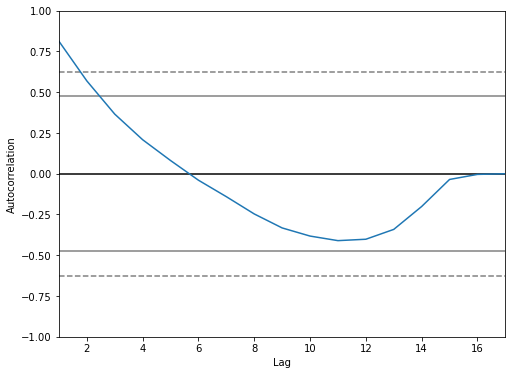

In [22]:
pd.plotting.autocorrelation_plot(opec_oil_na['2019':'2022']['Value'].resample('2m').mean())

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

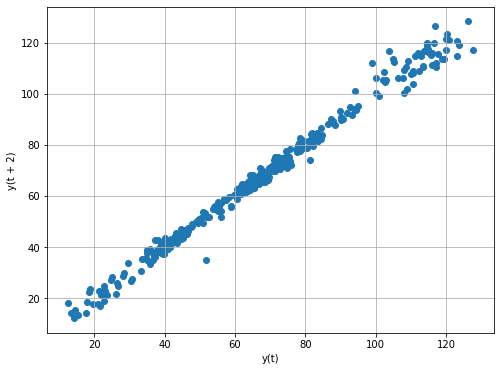

In [23]:
pd.plotting.lag_plot(data['Value'], lag=2)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

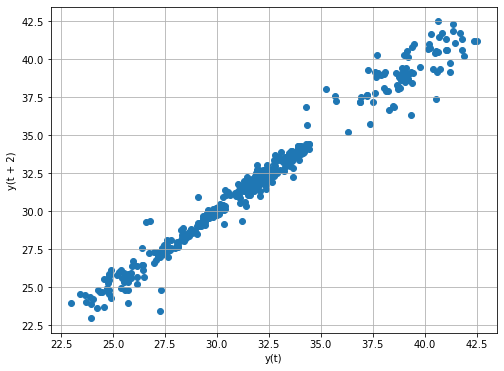

In [24]:
pd.plotting.lag_plot(data['Close'], lag=2)

In [25]:
data['Value']=data['Value'].rolling(window=3, min_periods=1).mean()

data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477806   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132671   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
...               ...        ...        ...        ...        ...        ...   
2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002    1602855   
2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002    3600958   
2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999    2396120   
2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001    5571191   
2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002    9113060   

              Value  
Date                 
2019-12-11   65.380  
2019-12-12   65.595  
2019-12-15   65.595  
2019-12-16   66.515  
2019-12-17   67.350  
...             ...  
2022-07-03  116.615  
2022-07-04  115.450  
2022-07-05  114.800  
2022-07-06  114.800  
2022-07-13  114.300  

[645 rows x 7 columns]

In [26]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Value        0
dtype: int64

In [27]:
data.tail(44)

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2022-05-09  41.681816  42.045452  41.545452  41.772728  41.434528  14025972   
2022-05-10  41.772728  42.000000  41.136364  41.772728  41.434528  10515429   
2022-05-11  41.636364  41.954544  41.363636  41.363636  41.028748   8108382   
2022-05-12  41.363636  41.363636  39.909088  40.636364  40.307362  15445749   
2022-05-15  42.000000  42.900002  40.750000  42.349998  42.007122  16405166   
2022-05-16  42.299999  43.349998  42.200001  42.500000  42.155910  16668242   
2022-05-17  42.500000  42.500000  40.549999  41.200001  40.866436  17043615   
2022-05-18  41.200001  41.200001  41.200001  41.200001  40.866436         0   
2022-05-19  40.049999  40.250000  39.500000  39.750000  39.428177  12118667   
2022-05-22  40.000000  40.099998  38.799999  39.200001  38.882629   8020847   
2022-05-23  39.349998  39.500000  38.950001  39.500000  39.180199   6550143   
2022-05-24  39.450001  40.200001  39.099998  40.150002  40.150002  11407875   
2022-05-25  40.200001  41.250000  40.200001  41.000000  41.000000   7913971   
2022-05-26  41.099998  41.450001  40.450001  40.700001  40.700001   7289917   
2022-05-29  41.099998  41.500000  41.099998  41.349998  41.349998   7459956   
2022-05-30  41.349998  41.750000  41.200001  41.450001  41.450001  10654289   
2022-05-31  41.799999  42.000000  41.250000  41.900002  41.900002  32685935   
2022-06-01  41.849998  41.849998  41.049999  41.049999  41.049999   5388000   
2022-06-02  41.000000  41.000000  40.200001  40.200001  40.200001   6187070   
2022-06-05  40.299999  40.750000  40.299999  40.650002  40.650002   4205182   
2022-06-06  40.700001  41.049999  40.700001  41.000000  41.000000   4943459   
2022-06-07  41.000000  41.049999  40.500000  40.500000  40.500000   3399501   
2022-06-08  40.549999  40.849998  40.400002  40.599998  40.599998   2576708   
2022-06-09  40.650002  40.799999  40.150002  40.400002  40.400002   5251751   
2022-06-12  40.099998  40.099998  39.150002  39.200001  39.200001   7310629   
2022-06-13  39.000000  39.599998  38.299999  39.400002  39.400002   9707147   
2022-06-14  39.400002  39.599998  38.599998  39.049999  39.049999   5922074   
2022-06-15  39.000000  39.200001  38.400002  38.450001  38.450001   5760259   
2022-06-16  38.450001  38.950001  38.450001  38.500000  38.500000   8447754   
2022-06-19  38.049999  38.099998  36.950001  36.950001  36.950001   8418316   
2022-06-20  36.900002  37.400002  36.549999  36.900002  36.900002   7867698   
2022-06-21  37.099998  37.799999  37.049999  37.500000  37.500000   5535262   
2022-06-22  37.599998  37.599998  37.000000  37.200001  37.200001   4328876   
2022-06-23  37.250000  37.599998  37.099998  37.200001  37.200001   4614276   
2022-06-26  37.549999  37.849998  37.549999  37.650002  37.650002   2969194   
2022-06-27  37.799999  37.799999  37.500000  37.599998  37.599998   3064123   
2022-06-28  37.650002  38.849998  37.650002  38.849998  38.849998   5585162   
2022-06-29  38.799999  39.599998  38.500000  39.200001  39.200001   5682287   
2022-06-30  39.200001  39.200001  38.750000  38.799999  38.799999   7681531   
2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002   1602855   
2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002   3600958   
2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999   2396120   
2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001   5571191   
2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002   9113060   

                 Value  
Date                    
2022-05-09  108.840000  
2022-05-10  110.230000  
2022-05-11  109.793333  
2022-05-12  108.733333  
2022-05-15  109.060000  
2022-05-16  111.090000  
2022-05-17  115.040000  
2022-05-18  114.973333  
2022-05-19  114.626667  
2022-05-22  113.390000  
2022-05-23  113.945000  
2022-05-24  115.455000  
2022-05-25  115.580000  
2022-05

In [28]:
data.rename( columns ={'Value': 'OPEC_price'}, inplace=True)
data

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477806   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132671   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
...               ...        ...        ...        ...        ...        ...   
2022-07-03  38.849998  38.950001  38.349998  38.650002  38.650002    1602855   
2022-07-04  38.500000  38.500000  37.900002  38.150002  38.150002    3600958   
2022-07-05  38.150002  38.400002  38.000000  38.299999  38.299999    2396120   
2022-07-06  37.950001  38.049999  37.700001  37.950001  37.950001    5571191   
2022-07-13  37.500000  37.599998  36.650002  36.650002  36.650002    9113060   

            OPEC_price  
Date                    
2019-12-11      65.380  
2019-12-12      65.595  
2019-12-15      65.595  
2019-12-16      66.515  
2019-12-17      67.350  
...                ...  
2022-07-03     116.615  
2022-07-04     115.450  
2022-07-05     114.800  
2022-07-06     114.800  
2022-07-13     114.300  

[645 rows x 7 columns]

In [29]:
final2_data=data[['Adj Close', 'OPEC_price']]

In [30]:
final_data= final2_data

In [31]:
from statsmodels.tsa.stattools import kpss

In [32]:
tstest= kpss(data['Adj Close'], 'ct')

c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [33]:
tstest

(0.23806319174159055,
 0.01,
 16,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [34]:
### the close data is not stationary

In [35]:
tstest_oil= kpss(data['OPEC_price'], 'ct')
tstest_oil

c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2019: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(0.41672033856735297,
 0.01,
 16,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [36]:
### Opec_price is not stationary

In [37]:
tstest_volume= kpss(data['Volume'])
tstest_volume

(0.588629200821444,
 0.023670072652596,
 13,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [38]:
### volume is aslo not stationary

In [39]:
import statsmodels.api as sm
### period here indicate how we want our data to splited
### using 30 days which indicates 1 month
def decomposition_plot(data_frame, variable:str, model_type:str, period:int):
    
    
#period= int(30)
    de= sm.tsa.seasonal_decompose(data_frame[variable], model= model_type, period=period)
    trend_estimate=de.trend
    seasonal_estimate= de.seasonal
    residual_estimate= de.resid
    fig, axes= plt.subplots(4,1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.set_facecolor('white')

    axes[0].plot(data_frame[variable], label='Original')
    axes[0].legend(loc='upper left')

    axes[1].plot(trend_estimate, label='Trend')
    axes[1].legend(loc='upper left')

    axes[2].plot(seasonal_estimate, label='Seasonaility')
    axes[2].legend(loc='upper left')

    axes[3].plot(residual_estimate, label='Residuals')
    axes[3].legend(loc='upper left')

#de.plot()
#plt.figure(facecolor='blue')

#plt.grid()

#plt.show()

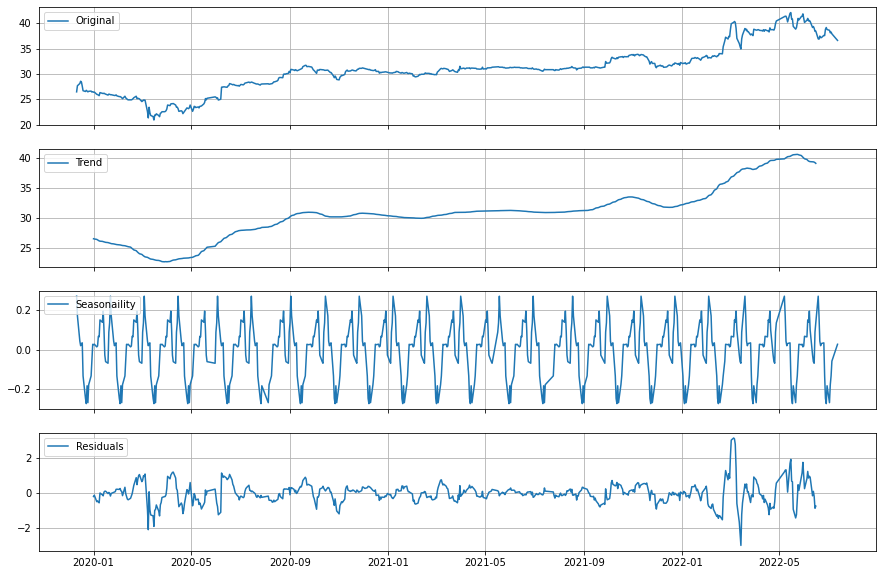

In [40]:
decomposition_plot(data, 'Adj Close', 'additive', 30)

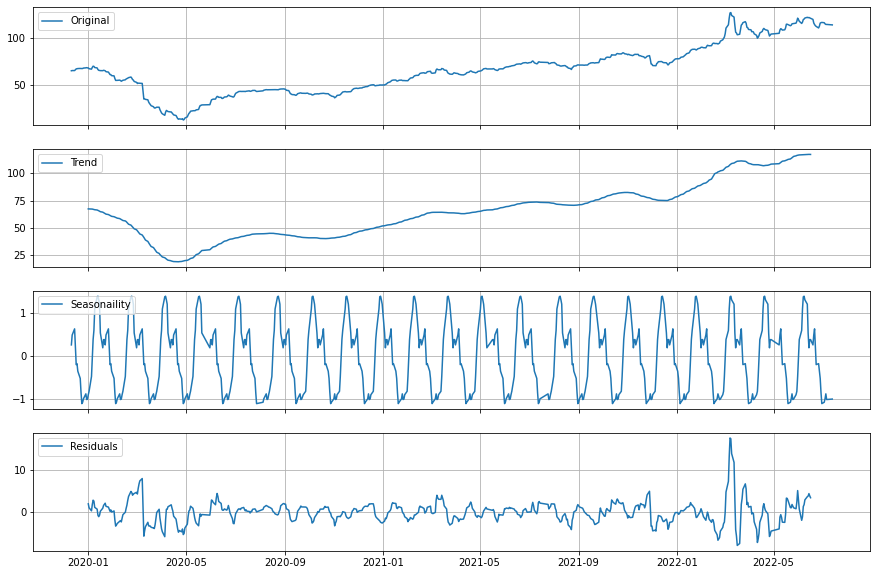

In [41]:
decomposition_plot(data, 'OPEC_price', 'additive', 30)

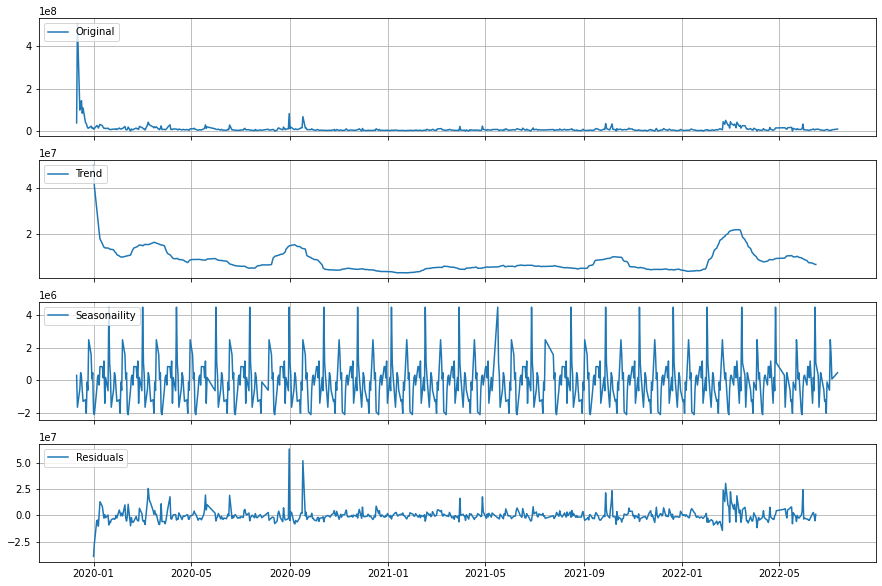

In [42]:
decomposition_plot(data, 'Volume', 'additive', 30)

In [43]:
data[['Adj Close','OPEC_price']].corr()

Adj Close  OPEC_price
Adj Close    1.000000    0.871493
OPEC_price   0.871493    1.000000

In [44]:
data[['Volume','OPEC_price']].corr()

Volume  OPEC_price
Volume      1.000000    0.025183
OPEC_price  0.025183    1.000000

In [45]:
data[['Volume','Adj Close']].corr()

Volume  Adj Close
Volume     1.000000  -0.054921
Adj Close -0.054921   1.000000

In [46]:
### we can clearly see that the volume of shares sold is not correlated with either OPEC_price or Closing share price

In [47]:
### making our data stationary
#### 1. Differencing and seasonal differencing
#### 2.Transformation

In [48]:
### Differncing
#### y(t) = y(t) -y(t-1)

<AxesSubplot:xlabel='Date'>

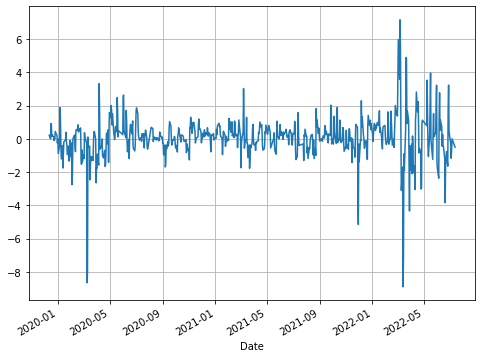

In [49]:
data['OPEC_price_diff']= data['OPEC_price'] -  data['OPEC_price'].shift(1)
data['OPEC_price_diff'].dropna().plot()

<AxesSubplot:xlabel='Date'>

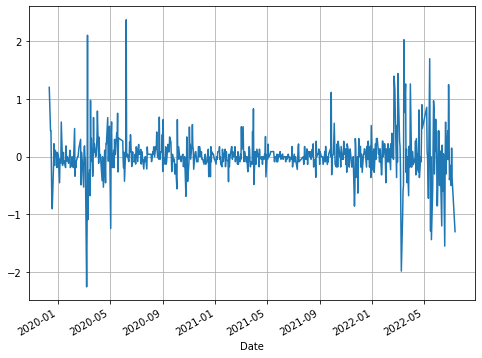

In [50]:
data['Adj_Close_diff']= data['Adj Close'] -  data['Adj Close'].shift(1)
data['Adj_Close_diff'].dropna().plot()

<AxesSubplot:xlabel='Date'>

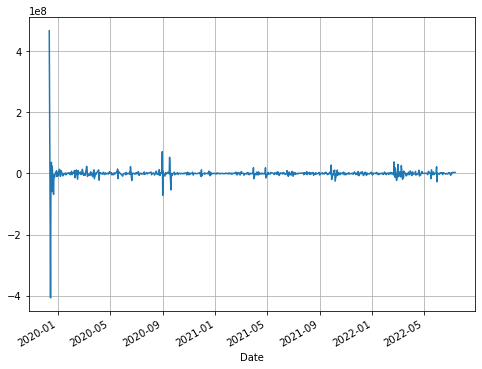

In [232]:
data['Volume_diff']= data['Volume'] -  data['Volume'].shift(1)
data['Volume_diff'].dropna().plot()

In [51]:
### Seasonal Differncing
##### y(t)= y(t) - y(t-n)

<AxesSubplot:xlabel='Date'>

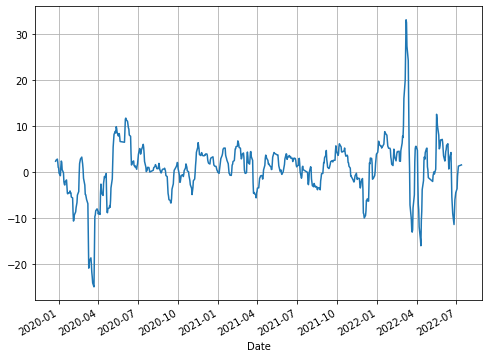

In [52]:
data['OPEC_price_diff']= data['OPEC_price'] -  data['OPEC_price'].shift(10)
data['OPEC_price_diff'].dropna().plot()

<AxesSubplot:xlabel='Date'>

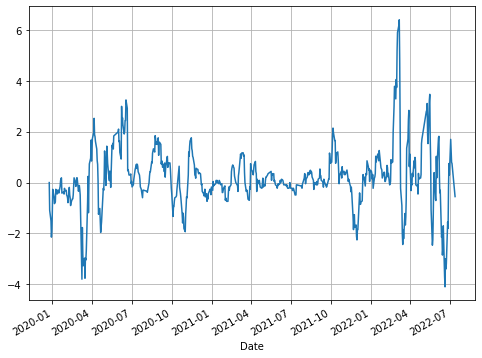

In [53]:
data['Adj_Close_diff10']= data['Adj Close'] -  data['Adj Close'].shift(10)
data['Adj_Close_diff10'].dropna().plot()

In [54]:
### Transformation

In [55]:
import numpy as np

### calculate the log
data['Adj_Close_log'] = np.log(data['Adj Close'])

### calculate the square root
data['Adj_Close_sqrt'] = np.sqrt(data['Adj Close'])

### calculate the cube root
data['Adj_Close_cbrt'] = np.cbrt(data['Adj Close'])


<AxesSubplot:xlabel='Date'>

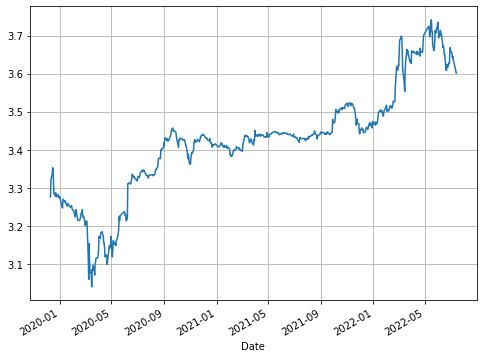

In [56]:
data['Adj_Close_log'].dropna().plot()

<AxesSubplot:xlabel='Date'>

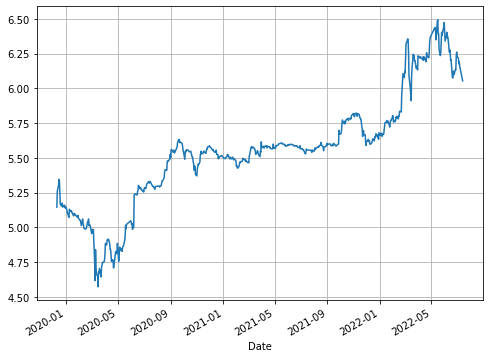

In [57]:
data['Adj_Close_sqrt'].dropna().plot()

<AxesSubplot:xlabel='Date'>

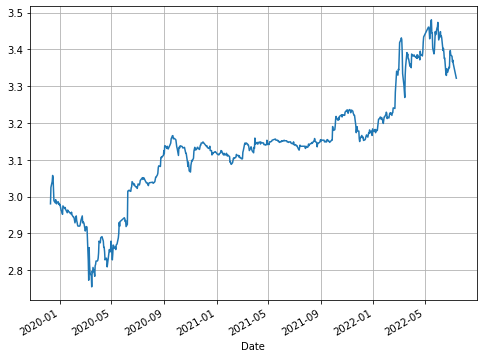

In [58]:
data['Adj_Close_cbrt'].dropna().plot()

In [59]:
import numpy as np

### calculate the log
data['OPEC_log'] = np.log(data['OPEC_price'])

### calculate the square root
data['OPEC_sqrt'] = np.sqrt(data['OPEC_price'])

### calculate the cube root
data['OPEC_cbrt'] = np.cbrt(data['OPEC_price'])


<AxesSubplot:xlabel='Date'>

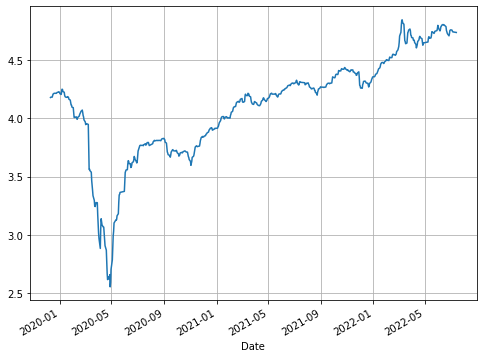

In [60]:
data['OPEC_log'].dropna().plot()

<AxesSubplot:xlabel='Date'>

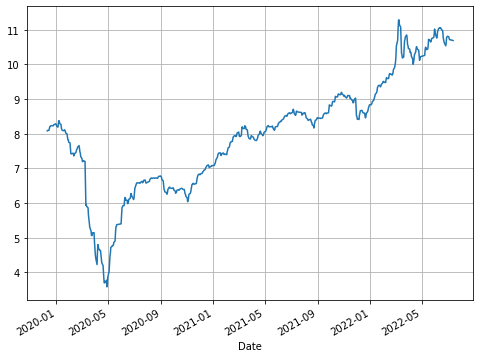

In [61]:
data['OPEC_sqrt'].dropna().plot()

<AxesSubplot:xlabel='Date'>

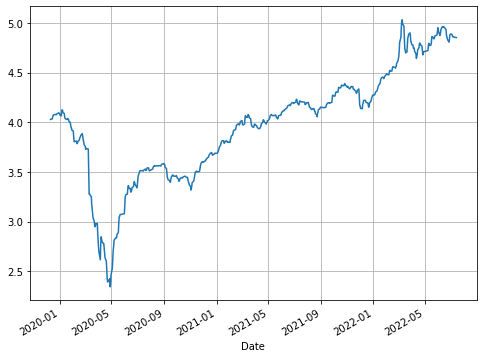

In [62]:
data['OPEC_cbrt'].dropna().plot()

<AxesSubplot:xlabel='Date'>

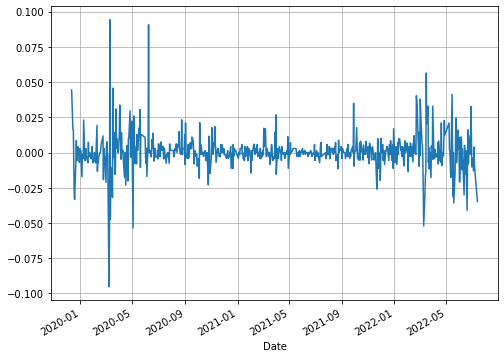

In [63]:
data['Adj_Close_log_diff1'] = data['Adj_Close_log'] - data['Adj_Close_log'].shift(1)
data['Adj_Close_log_diff1'].dropna().plot()

<AxesSubplot:xlabel='Date'>

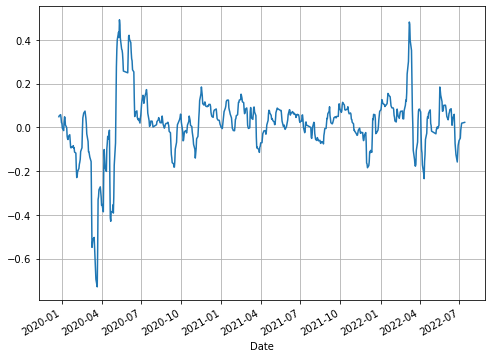

In [64]:
data['OPEC_cbrt_diff'] = data['OPEC_cbrt'] - data['OPEC_cbrt'].shift(10)
data['OPEC_cbrt_diff'].dropna().plot()

<AxesSubplot:xlabel='Date'>

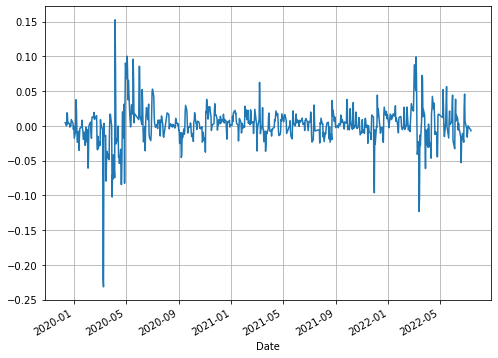

In [65]:
data['OPEC_cbrt_diff1'] = data['OPEC_cbrt'] - data['OPEC_cbrt'].shift(1)
data['OPEC_cbrt_diff1'].dropna().plot()

In [66]:
### Rolling statistics

In [67]:
data.head(44)

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2019-12-11  29.090908  29.090908  29.090908  29.090908  26.477806   38289394   
2019-12-12  31.983471  31.983471  29.752066  30.413223  27.681343  505692621   
2019-12-15  30.661158  30.991735  30.413223  30.909090  28.132671   98349281   
2019-12-16  30.991735  31.487602  30.991735  31.404959  28.583998  105973907   
2019-12-17  31.446280  31.528925  30.991735  31.198347  28.395945  142672245   
2019-12-18  30.991735  31.074381  30.330578  30.330578  27.606121   83822621   
2019-12-19  30.330578  30.371901  29.338842  29.338842  26.703472  108120197   
2019-12-22  29.421488  29.504131  28.842976  29.173553  26.553026   39709972   
2019-12-23  29.173553  29.462809  29.132231  29.421488  26.778690   35098090   
2019-12-24  29.462809  29.504131  29.173553  29.256199  26.628252   22184338   
2019-12-25  29.256199  29.256199  29.008265  29.090908  26.477806   13572736   
2019-12-26  29.049585  29.214876  28.966942  29.214876  26.590637   13863242   
2019-12-29  29.173553  29.504131  29.173553  29.256199  26.628252   22966690   
2019-12-30  29.256199  29.297520  29.049585  29.049585  26.440195   13147121   
2019-12-31  29.049585  29.132231  28.966942  29.132231  26.515417   16332772   
2020-01-01  29.132231  29.132231  28.966942  29.008265  26.402586    8517342   
2020-01-02  29.008265  29.132231  28.966942  29.049585  26.440195   11430744   
2020-01-05  28.925619  28.925619  28.512396  28.553719  25.988871   25239125   
2020-01-06  28.512396  28.553719  28.140495  28.512396  25.951256   23401835   
2020-01-07  28.471073  28.553719  28.223141  28.388430  25.838428   13923075   
2020-01-08  28.099173  28.264462  28.099173  28.264462  25.725597   22150479   
2020-01-09  28.388430  28.966942  28.347107  28.925619  26.327366   31310879   
2020-01-12  28.925619  29.049585  28.553719  28.760330  26.176922   24584632   
2020-01-13  28.760330  28.925619  28.677685  28.719007  26.139313   16978173   
2020-01-14  28.719007  28.801653  28.429752  28.801653  26.214535   12477898   
2020-01-15  28.760330  28.760330  28.595041  28.677685  26.101700   12987230   
2020-01-16  28.677685  28.677685  28.512396  28.595041  26.026480   11523975   
2020-01-19  28.595041  28.595041  28.305784  28.388430  25.838428   13254735   
2020-01-20  28.347107  28.595041  28.264462  28.595041  26.026480    8756076   
2020-01-21  28.512396  28.595041  28.388430  28.553719  25.988871    8517485   
2020-01-22  28.471073  28.512396  28.388430  28.471073  25.913651    6215751   
2020-01-23  28.429752  28.471073  28.305784  28.471073  25.913651    7192433   
2020-01-26  28.264462  28.388430  28.140495  28.347107  25.800816    9257143   
2020-01-27  28.305784  28.305784  28.140495  28.305784  25.763208    8758776   
2020-01-28  28.264462  28.305784  28.140495  28.305784  25.763208    8813615   
2020-01-29  28.181818  28.429752  28.140495  28.429752  25.876040   10761242   
2020-01-30  28.429752  28.429752  28.223141  28.223141  25.687984    6889782   
2020-02-02  28.181818  28.181818  27.975206  28.057852  25.537544   13991469   
2020-02-03  27.975206  28.099173  27.933884  28.057852  25.537544   10062499   
2020-02-04  28.016527  28.099173  27.892561  27.975206  25.462324    9112708   
2020-02-05  27.933884  28.057852  27.768595  27.809917  25.311880   11068032   
2020-02-06  27.809917  27.892561  27.520660  27.603306  25.123825   11614195   
2020-02-09  27.561983  28.140495  27.107437  28.140495  25.612762   21426588   
2020-02-10  28.057852  28.057852  27.727272  27.768595  25.274269    7540306   

            OPEC_price  OPEC_price_diff  Adj_Close_diff  Adj_Close_diff10  \
Date                                                                        
2019-12-11   65.380000              NaN             NaN               NaN   
2019-12-12   65.595000              NaN        1.203537               NaN   
2019-12-15   65.595000      

In [68]:
tstest_oil_log_diff= kpss(data['OPEC_cbrt_diff1'].dropna(), 'ct')
tstest_oil_log_diff

c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




(0.10096892267097292,
 0.1,
 9,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [233]:
tstest_Volume_diff= kpss(data['Volume_diff'].dropna(), 'ct')
tstest_Volume_diff

c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




(0.1151043129933016,
 0.1,
 148,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [69]:
tstest_oil_log= kpss(data['OPEC_log'].dropna(), 'ct')
tstest_oil

(0.41672033856735297,
 0.01,
 16,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [70]:
tstest_close_log_diff= kpss(data['Adj_Close_log_diff1'].dropna(), 'ct')
tstest_close_log_diff

c:\users\maingate\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




(0.048723486430730045,
 0.1,
 6,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [71]:
new_train= data[['OPEC_cbrt_diff1', 'Adj_Close_log_diff1']]

In [72]:
new_train

OPEC_cbrt_diff1  Adj_Close_log_diff1
Date                                            
2019-12-11              NaN                  NaN
2019-12-12         0.004411             0.044452
2019-12-15         0.000000             0.016173
2019-12-16         0.018767             0.015915
2019-12-17         0.016884            -0.006601
...                     ...                  ...
2022-07-03        -0.004349            -0.003873
2022-07-04        -0.016324            -0.013021
2022-07-05        -0.009155             0.003924
2022-07-06         0.000000            -0.009180
2022-07-13        -0.007066            -0.034856

[645 rows x 2 columns]

In [73]:
new_train= new_train[['OPEC_cbrt_diff1', 'Adj_Close_log_diff1']].fillna(method='bfill') 

In [74]:
from statsmodels.tsa.stattools import grangercausalitytests

In [75]:
max_lags=5

In [76]:
result=grangercausalitytests(new_train[['OPEC_cbrt_diff1', 'Adj_Close_log_diff1']], max_lags, verbose=False)

In [77]:
result

{1: ({'ssr_ftest': (75.9186744924953, 2.5134646908707308e-17, 641.0, 1),
   'ssr_chi2test': (76.27398810166454, 2.4691498905915206e-18, 1),
   'lrtest': (72.08482144170102, 2.0614328670787248e-17, 1),
   'params_ftest': (75.91867449249527, 2.5134646908707308e-17, 641.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (41.43517839984847, 1.2060358276689898e-17, 638.0, 2),
   'ssr_chi2test': (83.51981100659113, 7.30976600939957e-19, 2),
   'lrtest': (78.52382068790939, 8.88728256827268e-18, 2),
   'params_ftest': (41.43517839984843, 1.2060358276690412e-17, 638.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (29.786552686151033, 5.004735638121674e-18, 635.0, 3),
   'ssr_chi2test': (90.34472515516046, 1.8471976240152172e-19, 3),
   'lrtest': (84.52766873970995, 3.2774731156825234e-18, 3),
   'params_ftest': (29.786552686151012, 5.004735638121674e-18, 635.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0

In [78]:
p_values=[round(result[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

In [79]:
print('P values per lag -'+str(p_values))



P values per lag -[0.0, 0.0, 0.0, 0.0, 0.0]


In [80]:
new_train

OPEC_cbrt_diff1  Adj_Close_log_diff1
Date                                            
2019-12-11         0.004411             0.044452
2019-12-12         0.004411             0.044452
2019-12-15         0.000000             0.016173
2019-12-16         0.018767             0.015915
2019-12-17         0.016884            -0.006601
...                     ...                  ...
2022-07-03        -0.004349            -0.003873
2022-07-04        -0.016324            -0.013021
2022-07-05        -0.009155             0.003924
2022-07-06         0.000000            -0.009180
2022-07-13        -0.007066            -0.034856

[645 rows x 2 columns]

In [81]:
train_final= new_train.reset_index()[['Date', 'OPEC_cbrt_diff1','Adj_Close_log_diff1']].rename({'Date': 'ds', 'OPEC_cbrt_diff1':'Opec_oil', 'Adj_Close_log_diff1': 'y'}, axis='columns')

In [82]:
train_final

ds  Opec_oil         y
0   2019-12-11  0.004411  0.044452
1   2019-12-12  0.004411  0.044452
2   2019-12-15  0.000000  0.016173
3   2019-12-16  0.018767  0.015915
4   2019-12-17  0.016884 -0.006601
..         ...       ...       ...
640 2022-07-03 -0.004349 -0.003873
641 2022-07-04 -0.016324 -0.013021
642 2022-07-05 -0.009155  0.003924
643 2022-07-06  0.000000 -0.009180
644 2022-07-13 -0.007066 -0.034856

[645 rows x 3 columns]

In [83]:
train_final['month'] = train_final['ds'].dt.month
train_final

ds  Opec_oil         y  month
0   2019-12-11  0.004411  0.044452     12
1   2019-12-12  0.004411  0.044452     12
2   2019-12-15  0.000000  0.016173     12
3   2019-12-16  0.018767  0.015915     12
4   2019-12-17  0.016884 -0.006601     12
..         ...       ...       ...    ...
640 2022-07-03 -0.004349 -0.003873      7
641 2022-07-04 -0.016324 -0.013021      7
642 2022-07-05 -0.009155  0.003924      7
643 2022-07-06  0.000000 -0.009180      7
644 2022-07-13 -0.007066 -0.034856      7

[645 rows x 4 columns]

In [84]:
def winter(month):
    if month == 12:
        return 1
    elif month==1:
        return 1
    elif month==2:
        return 1
    elif month ==3:
        return 1
    else:
        return 0

In [85]:
train_final['winter'] =train_final['month'].apply(winter)


In [86]:

train_final

ds  Opec_oil         y  month  winter
0   2019-12-11  0.004411  0.044452     12       1
1   2019-12-12  0.004411  0.044452     12       1
2   2019-12-15  0.000000  0.016173     12       1
3   2019-12-16  0.018767  0.015915     12       1
4   2019-12-17  0.016884 -0.006601     12       1
..         ...       ...       ...    ...     ...
640 2022-07-03 -0.004349 -0.003873      7       0
641 2022-07-04 -0.016324 -0.013021      7       0
642 2022-07-05 -0.009155  0.003924      7       0
643 2022-07-06  0.000000 -0.009180      7       0
644 2022-07-13 -0.007066 -0.034856      7       0

[645 rows x 5 columns]

In [87]:
### pandenmic_restrictions
### if value = 1 then most countries have put in place strict covid-19 
### if value = 0 then most  countries have lifted their extreme covid-19 restrictions

In [88]:
def Pandenmic_restrictions(ds):
    if (ds.year <= 2020):
        return 1
    elif(ds.year ==2021 and ds.month<=10):
        return 1
    else:
        return 0

In [89]:
train_final['Pandenmic_restrictions'] =train_final['ds'].apply(Pandenmic_restrictions)


In [90]:
train_final

ds  Opec_oil         y  month  winter  Pandenmic_restrictions
0   2019-12-11  0.004411  0.044452     12       1                       1
1   2019-12-12  0.004411  0.044452     12       1                       1
2   2019-12-15  0.000000  0.016173     12       1                       1
3   2019-12-16  0.018767  0.015915     12       1                       1
4   2019-12-17  0.016884 -0.006601     12       1                       1
..         ...       ...       ...    ...     ...                     ...
640 2022-07-03 -0.004349 -0.003873      7       0                       0
641 2022-07-04 -0.016324 -0.013021      7       0                       0
642 2022-07-05 -0.009155  0.003924      7       0                       0
643 2022-07-06  0.000000 -0.009180      7       0                       0
644 2022-07-13 -0.007066 -0.034856      7       0                       0

[645 rows x 6 columns]

In [91]:
train_final[['Pandenmic_restrictions', 'ds']]

Pandenmic_restrictions         ds
0                         1 2019-12-11
1                         1 2019-12-12
2                         1 2019-12-15
3                         1 2019-12-16
4                         1 2019-12-17
..                      ...        ...
640                       0 2022-07-03
641                       0 2022-07-04
642                       0 2022-07-05
643                       0 2022-07-06
644                       0 2022-07-13

[645 rows x 2 columns]

In [92]:
### Ukraine_crisis
#### if value=1 then the invasion of Ukraine by Russia has started or it is ongoing
#### which subsequently made the western nations to respond with sanctions on most of russia oiland gas export

#### if value= 0 then the invasion has not happened

In [93]:
def Ukraine_crisis(ds):
  #  if(ds.year <=2021):
   #     return 0
    if(ds.year ==2022 and ds.month>=2):
        return 1
    else:
        return 0

In [94]:
train_final['Ukraine_crisis'] =train_final['ds'].apply(Ukraine_crisis)


In [95]:
train_final

ds  Opec_oil         y  month  winter  Pandenmic_restrictions  \
0   2019-12-11  0.004411  0.044452     12       1                       1   
1   2019-12-12  0.004411  0.044452     12       1                       1   
2   2019-12-15  0.000000  0.016173     12       1                       1   
3   2019-12-16  0.018767  0.015915     12       1                       1   
4   2019-12-17  0.016884 -0.006601     12       1                       1   
..         ...       ...       ...    ...     ...                     ...   
640 2022-07-03 -0.004349 -0.003873      7       0                       0   
641 2022-07-04 -0.016324 -0.013021      7       0                       0   
642 2022-07-05 -0.009155  0.003924      7       0                       0   
643 2022-07-06  0.000000 -0.009180      7       0                       0   
644 2022-07-13 -0.007066 -0.034856      7       0                       0   

     Ukraine_crisis  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
..              ...  
640               1  
641               1  
642               1  
643               1  
644               1  

[645 rows x 7 columns]

In [96]:
train_final.describe()

Opec_oil           y       month      winter  Pandenmic_restrictions  \
count  645.000000  645.000000  645.000000  645.000000              645.000000   
mean     0.001285    0.000573    6.082171    0.392248                0.731783   
std      0.028369    0.012909    3.526441    0.488630                0.443375   
min     -0.231708   -0.095310    1.000000    0.000000                0.000000   
25%     -0.007106   -0.003242    3.000000    0.000000                0.000000   
50%      0.002410    0.000000    6.000000    0.000000                1.000000   
75%      0.012540    0.004283    9.000000    1.000000                1.000000   
max      0.152533    0.094187   12.000000    1.000000                1.000000   

       Ukraine_crisis  
count      645.000000  
mean         0.165891  
std          0.372272  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

In [97]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ds                      645 non-null    datetime64[ns]
 1   Opec_oil                645 non-null    float64       
 2   y                       645 non-null    float64       
 3   month                   645 non-null    int64         
 4   winter                  645 non-null    int64         
 5   Pandenmic_restrictions  645 non-null    int64         
 6   Ukraine_crisis          645 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 35.4 KB


In [98]:
def causality_test(data, target:str , variable:str, max_lags:int):
    result=grangercausalitytests(data[[target, variable]], max_lags, verbose=False)
    p_values=[round(result[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
    print('P values per lag -'+str(p_values))


    
    

In [99]:
### we're going to carry out granger causality test 

In [100]:
causality_test(train_final, 'y', 'winter', 27)

P values per lag -[0.6887, 0.3262, 0.4809, 0.4354, 0.5782, 0.713, 0.8066, 0.8845, 0.8344, 0.8869, 0.8759, 0.8548, 0.8587, 0.8997, 0.8892, 0.913, 0.9424, 0.8926, 0.9004, 0.8973, 0.8894, 0.9126, 0.8243, 0.8574, 0.8629, 0.8296, 0.8715]


In [101]:
### therfore winter does not granger causes y; so we are not going to use winter in  our multivariate analysis

In [102]:
causality_test(train_final, 'y', 'Opec_oil', 27)

P values per lag -[0.0346, 0.1491, 0.0625, 0.2246, 0.2565, 0.2137, 0.3037, 0.4198, 0.0048, 0.0126, 0.0179, 0.0182, 0.015, 0.0195, 0.0123, 0.0211, 0.0264, 0.0243, 0.0181, 0.0014, 0.0018, 0.0015, 0.0019, 0.0016, 0.0024, 0.0051, 0.008]


In [103]:
#### Opec_oil granger causes y

In [104]:
causality_test(train_final, 'y', 'Ukraine_crisis', 27)

P values per lag -[0.7988, 0.5092, 0.6896, 0.7928, 0.8505, 0.9147, 0.9505, 0.972, 0.9743, 0.9838, 0.9921, 0.9833, 0.9893, 0.9944, 0.6191, 0.2592, 0.2006, 0.221, 0.1915, 0.2376, 0.028, 0.0104, 0.009, 0.0124, 0.0178, 0.0052, 0.0]


In [105]:
### Ukraine_crisis granger causes y at lags greater than 20

In [106]:
causality_test(train_final, 'y', 'month', 27)

P values per lag -[0.7319, 0.833, 0.4449, 0.5297, 0.6406, 0.7863, 0.6214, 0.7385, 0.775, 0.8269, 0.8835, 0.9204, 0.9204, 0.9491, 0.9699, 0.9662, 0.9697, 0.9974, 0.9982, 0.9996, 0.9994, 0.9999, 0.9999, 0.9991, 0.9994, 0.9997, 0.9997]


In [107]:
###  month does not granger causes y

In [108]:
### therefore , for our prediction involving the stock closing price of ARAMCO , we would only need
###  Opec_oil  and Ukraine_crisis column for the  analysis

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [110]:
df_input= train_final[['y', 'Opec_oil', 'Ukraine_crisis']]
df_input

y  Opec_oil  Ukraine_crisis
0    0.044452  0.004411               0
1    0.044452  0.004411               0
2    0.016173  0.000000               0
3    0.015915  0.018767               0
4   -0.006601  0.016884               0
..        ...       ...             ...
640 -0.003873 -0.004349               1
641 -0.013021 -0.016324               1
642  0.003924 -0.009155               1
643 -0.009180  0.000000               1
644 -0.034856 -0.007066               1

[645 rows x 3 columns]

In [111]:
df_input[-45:]

y  Opec_oil  Ukraine_crisis
600  0.020937  0.011863               1
601  0.002179  0.052111               1
602  0.000000  0.020239               1
603 -0.009842 -0.006340               1
604 -0.017739 -0.015460               1
605  0.041305  0.004775               1
606  0.003536  0.029462               1
607 -0.031066  0.056314               1
608  0.000000 -0.000940               1
609 -0.035828 -0.004892               1
610 -0.013933 -0.017532               1
611  0.007624  0.007884               1
612  0.024451  0.021321               1
613  0.020950  0.001757               1
614 -0.007344  0.002574               1
615  0.015844  0.005630               1
616  0.002416  0.029089               1
617  0.010798  0.044152               1
618 -0.020495 -0.020036               1
619 -0.020924 -0.024739               1
620  0.011132 -0.032950               1
621  0.008573  0.019420               1
622 -0.012270  0.038247               1
623  0.002466  0.007000               1
624 -0.004938  0.015254               1
625 -0.030153  0.010005               1
626  0.005089 -0.005957               1
627 -0.008923  0.003522               1
628 -0.015484 -0.005081               1
629  0.001300 -0.006429               1
630 -0.041093 -0.016260               1
631 -0.001354 -0.053137               1
632  0.016129 -0.022980               1
633 -0.008032 -0.017385               1
634  0.000000 -0.010929               1
635  0.012024 -0.023571               1
636 -0.001329  0.027829               1
637  0.032704  0.045636               1
638  0.008969  0.006593               1
639 -0.010257  0.003348               1
640 -0.003873 -0.004349               1
641 -0.013021 -0.016324               1
642  0.003924 -0.009155               1
643 -0.009180  0.000000               1
644 -0.034856 -0.007066               1

In [112]:
### apply scaling techniques in order for the gradient descent to converge faster
#### in this case we would apply StandardScaler to account for the outliers present, so 

In [231]:
final_data

Adj Close  OPEC_price
Date                             
2019-12-11  26.477806      65.380
2019-12-12  27.681343      65.595
2019-12-15  28.132671      65.595
2019-12-16  28.583998      66.515
2019-12-17  28.395945      67.350
...               ...         ...
2022-07-03  38.650002     116.615
2022-07-04  38.150002     115.450
2022-07-05  38.299999     114.800
2022-07-06  37.950001     114.800
2022-07-13  36.650002     114.300

[645 rows x 2 columns]

In [115]:
Ukraine2= train_final[['ds', 'Ukraine_crisis']]
ukraine2= Ukraine2.set_index('ds')

In [116]:
frames3= [final2_data, ukraine2]

In [118]:
data3=pd.concat(frames3, axis=1)
#data3=pd.DataFrame(data3, index=['Date'])
data3['Date']=data3.index.rename('Date', inplace=False)

In [119]:
data4= data3.copy()

In [120]:
data4.reset_index(drop=True, inplace=True)
lag_features=['Adj Close', 'OPEC_price']
window1=3
window2=7
window3=21

window5=2

data4_rolled_3d=data4[lag_features].rolling(window=window1, min_periods=1)
data4_rolled_7d=data4[lag_features].rolling(window=window2, min_periods=0)
data4_rolled_21d=data4[lag_features].rolling(window=window3, min_periods=1)

data4_rolled_2d= data4[lag_features].shift(2)

data4_mean_3d=data4_rolled_3d.mean().shift(1).reset_index()
data4_mean_7d=data4_rolled_7d.mean().shift(1).reset_index()
data4_mean_21d=data4_rolled_21d.mean().shift(1).reset_index()

data4_std_3d=data4_rolled_3d.std().shift(1).reset_index()
data4_std_7d=data4_rolled_7d.std().shift(1).reset_index()
data4_std_21d=data4_rolled_21d.std().shift(1).reset_index()

data4_2d=data4_rolled_2d.reset_index()


for feature in lag_features:
    data4[f"{feature}_mean_lag{window1}"]= data4_mean_3d[feature]
    data4[f"{feature}_mean_lag{window2}"]= data4_mean_7d[feature]
    data4[f"{feature}_mean_lag{window3}"]= data4_mean_21d[feature]
    
    data4[f"{feature}_std_lag{window1}"]= data4_std_3d[feature]
    data4[f"{feature}_std_lag{window2}"]= data4_std_7d[feature]
    data4[f"{feature}_std_lag{window3}"]= data4_std_21d[feature]
    
    data4[f"{feature}_lag_{window5}"]= data4_2d[feature]
    
data4.fillna(data4.mean(), inplace=True)
#data4.set_index('Date', drop=False, inplace=True)

data4.head()










C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:37: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Adj Close  OPEC_price  Ukraine_crisis       Date  Adj Close_mean_lag3  \
0  26.477806      65.380               0 2019-12-11            30.864914   
1  27.681343      65.595               0 2019-12-12            26.477806   
2  28.132671      65.595               0 2019-12-15            27.079574   
3  28.583998      66.515               0 2019-12-16            27.430607   
4  28.395945      67.350               0 2019-12-17            28.132671   

   Adj Close_mean_lag7  Adj Close_mean_lag21  Adj Close_std_lag3  \
0            30.830716             30.714467            0.203759   
1            26.477806             26.477806            0.203759   
2            27.079574             27.079574            0.851029   
3            27.430607             27.430607            0.855451   
4            27.718954             27.718954            0.451328   

   Adj Close_std_lag7  Adj Close_std_lag21  Adj Close_lag_2  \
0            0.326155             0.571531        30.871607   
1            0.326155             0.571531        30.871607   
2            0.851029             0.851029        26.477806   
3            0.855451             0.855451        27.681343   
4            0.905783             0.905783        28.132671   

   OPEC_price_mean_lag3  OPEC_price_mean_lag7  OPEC_price_mean_lag21  \
0             65.687385             65.531733              64.996012   
1             65.380000             65.380000              65.380000   
2             65.487500             65.487500              65.487500   
3             65.523333             65.523333              65.523333   
4             65.901667             65.771250              65.771250   

   OPEC_price_std_lag3  OPEC_price_std_lag7  OPEC_price_std_lag21  \
0             0.775081             1.444716              2.852684   
1             0.775081             1.444716              2.852684   
2             0.152028             0.152028              0.152028   
3             0.124130             0.124130              0.124130   
4             0.531162             0.506086              0.506086   

   OPEC_price_lag_2  
0         65.687807  
1         65.687807  
2         65.380000  
3         65.595000  
4         65.595000

In [133]:
scaler= MinMaxScaler()

In [121]:
features=df_input
target=df_input['y']
target

0      0.044452
1      0.044452
2      0.016173
3      0.015915
4     -0.006601
         ...   
640   -0.003873
641   -0.013021
642    0.003924
643   -0.009180
644   -0.034856
Name: y, Length: 645, dtype: float64

In [122]:
exogenous_features5 =['OPEC_price_mean_lag3', 'Adj Close_mean_lag3', 'Adj Close_std_lag3', 'Ukraine_crisis', 'Adj Close_std_lag7', 'OPEC_price_lag_2']
df_input4= data4[exogenous_features5]

In [123]:
r=data['Adj Close']
r.reset_index(drop=True, inplace=True)
target4= r
features4= data4[exogenous_features5]

In [124]:
data4[exogenous_features5]

OPEC_price_mean_lag3  Adj Close_mean_lag3  Adj Close_std_lag3  \
0               65.687385            30.864914            0.203759   
1               65.380000            26.477806            0.203759   
2               65.487500            27.079574            0.851029   
3               65.523333            27.430607            0.855451   
4               65.901667            28.132671            0.451328   
..                    ...                  ...                 ...   
640            116.609444            38.949999            0.217946   
641            116.742778            38.883334            0.284312   
642            116.330556            38.533334            0.340342   
643            115.621667            38.366668            0.256580   
644            115.016667            38.133334            0.175593   

     Ukraine_crisis  Adj Close_std_lag7  OPEC_price_lag_2  
0                 0            0.326155         65.687807  
1                 0            0.326155         65.687807  
2                 0            0.851029         65.380000  
3                 0            0.855451         65.595000  
4                 0            0.905783         65.595000  
..              ...                 ...               ...  
640               1            0.849439        116.686667  
641               1            0.775057        116.926667  
642               1            0.622973        116.615000  
643               1            0.531844        115.450000  
644               1            0.441048        114.800000  

[645 rows x 6 columns]

In [125]:
x_train, x_test, y_train, y_test= train_test_split(features,target, test_size=0.10, random_state=45, shuffle=False)

In [126]:
x_train4, x_test4, y_train4, y_test4= train_test_split(features4,target4, test_size=0.10, random_state=45, shuffle=False)

In [127]:
#features_scaled= scaler.fit_transform(features)

In [128]:
#target_scaled = scaler.fit_transform(target.values.reshape(-1,1))

In [129]:
x_train1, x_test1, y_train1, y_test1= train_test_split(features,target, test_size=0.10, random_state=45, shuffle=False)

In [130]:
### reshaping the series to an array and then converting it to a 2D array
x_test1= x_test.values
y_test1= y_test.values.reshape(-1, 1)

In [134]:
x_train_scaled = scaler.fit_transform(x_train)
y_train_scaled= scaler.fit_transform(pd.DataFrame(y_train))


In [135]:
xtest = x_test.values
x_test_scaled= scaler.fit_transform(x_test)
y_test_scaled= scaler.fit_transform(pd.DataFrame(y_test))


In [136]:
x_train_scaled.shape

(580, 3)

In [137]:
x_train_scaled

array([[0.73754023, 0.61450784, 0.        ],
       [0.73754023, 0.61450784, 0.        ],
       [0.58830935, 0.60302784, 0.        ],
       ...,
       [0.48410503, 0.44295799, 1.        ],
       [0.47771337, 0.58730072, 1.        ],
       [0.67722298, 0.53201477, 1.        ]])

In [138]:
x_test_scaled.shape

(65, 3)

In [139]:
xtest = x_test.values
x_test_scaled= scaler.fit_transform(x_test)
y_test_scaled= scaler.fit_transform(pd.DataFrame(y_test))


In [140]:
x_train_scaled4 = scaler.fit_transform(x_train4)
y_train_scaled4= scaler.fit_transform(pd.DataFrame(y_train4))


In [141]:
xtest4 = x_test4.values
x_test_scaled4= scaler.fit_transform(x_test4)
y_test_scaled4= scaler.fit_transform(pd.DataFrame(y_test4))


In [142]:
x_test_scaled4.shape

(65, 6)

In [143]:
win_length= 21
batch_size=16
num_features=3
train_generator= TimeseriesGenerator(x_train_scaled, y_train_scaled, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator= TimeseriesGenerator(x_test_scaled, y_test_scaled, length=win_length, sampling_rate=1, batch_size=batch_size)


In [144]:
train_generator[0]

(array([[[0.73754023, 0.61450784, 0.        ],
         [0.73754023, 0.61450784, 0.        ],
         [0.58830935, 0.60302784, 0.        ],
         ...,
         [0.49531954, 0.70061093, 0.        ],
         [0.47996961, 0.6665953 , 0.        ],
         [0.47986837, 0.59188976, 0.        ]],
 
        [[0.73754023, 0.61450784, 0.        ],
         [0.58830935, 0.60302784, 0.        ],
         [0.5869508 , 0.6518702 , 0.        ],
         ...,
         [0.47996961, 0.6665953 , 0.        ],
         [0.47986837, 0.59188976, 0.        ],
         [0.62498279, 0.54087726, 0.        ]],
 
        [[0.58830935, 0.60302784, 0.        ],
         [0.5869508 , 0.6518702 , 0.        ],
         [0.46813024, 0.64696921, 0.        ],
         ...,
         [0.47986837, 0.59188976, 0.        ],
         [0.62498279, 0.54087726, 0.        ],
         [0.47272107, 0.58249493, 0.        ]],
 
        ...,
 
        [[0.46556203, 0.61364204, 0.        ],
         [0.51795493, 0.58956233, 0.     

In [145]:
test_generator[0]

(array([[[0.44226344, 0.44329157, 0.        ],
         [0.49871066, 0.20356347, 0.        ],
         [0.52696709, 0.50844856, 0.        ],
         ...,
         [0.77549132, 0.61931152, 0.        ],
         [0.64829163, 0.64022389, 0.        ],
         [0.75281269, 0.59387344, 0.        ]],
 
        [[0.49871066, 0.20356347, 0.        ],
         [0.52696709, 0.50844856, 0.        ],
         [0.49871066, 0.44044873, 0.        ],
         ...,
         [0.64829163, 0.64022389, 0.        ],
         [0.75281269, 0.59387344, 0.        ],
         [0.52515192, 0.96159898, 0.        ]],
 
        [[0.52696709, 0.50844856, 0.        ],
         [0.49871066, 0.44044873, 0.        ],
         [0.45630131, 0.20869192, 0.        ],
         ...,
         [0.75281269, 0.59387344, 0.        ],
         [0.52515192, 0.96159898, 0.        ],
         [0.49871066, 0.67040534, 0.        ]],
 
        ...,
 
        [[0.75303084, 0.3723595 , 0.        ],
         [0.3863361 , 0.40870569, 0.     

In [146]:
win_length4= 21
batch_size=16
num_features4=6
train_generator4= TimeseriesGenerator(x_train_scaled4, y_train_scaled4, length=win_length4, sampling_rate=1, batch_size=batch_size)
test_generator4= TimeseriesGenerator(x_test_scaled4, y_test_scaled4, length=win_length4, sampling_rate=1, batch_size=batch_size)


In [204]:
model_lstm4= tf.keras.Sequential()
model_lstm4.add(tf.keras.layers.LSTM(128, input_shape=(win_length4, num_features4), return_sequences=True))
model_lstm4.add(tf.keras.layers.LeakyReLU(alpha=0.6))
model_lstm4.add(tf.keras.layers.LSTM(128, return_sequences=True))
model_lstm4.add(tf.keras.layers.LeakyReLU(alpha=0.6))
model_lstm4.add(tf.keras.layers.Dropout(0.2))
model_lstm4.add(tf.keras.layers.LSTM(64, return_sequences=False))
model_lstm4.add(tf.keras.layers.Dropout(0.2))
model_lstm4.add(tf.keras.layers.Dense(2))

In [205]:
model_lstm4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 21, 128)           69120     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 21, 128)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 21, 128)           131584    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 21, 128)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 21, 128)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [207]:
early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=45,
                                                     mode='min')

model_lstm4.compile(loss= tf.losses.MeanSquaredError(),
              optimizer= tf.optimizers.Adam(),
              metrics= [tf.metrics.MeanAbsoluteError()])

history= model_lstm4.fit_generator(train_generator4, epochs=200,
                             validation_data=test_generator4,
                             shuffle= False,
                             callbacks=[early_stopping])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate for 3 steps
Epoch 1/200
35/35 [==============================] - 18s 505ms/step - loss: 0.0030 - mean_absolute_error: 0.0443 - val_loss: 0.0612 - val_mean_absolute_error: 0.2032
Epoch 2/200
35/35 [==============================] - 6s 173ms/step - loss: 0.0019 - mean_absolute_error: 0.0334 - val_loss: 0.0657 - val_mean_absolute_error: 0.2099
Epoch 3/200
35/35 [==============================] - 6s 170ms/step - loss: 0.0020 - mean_absolute_error: 0.0328 - val_loss: 0.0619 - val_mean_absolute_error: 0.2051
Epoch 4/200
35/35 [==============================] - 6s 170ms/step - loss: 0.0035 - mean_absolute_error: 0.0463 - val_loss: 0.0685 - val_mean_absolute_error: 0.2134
Epoch 5/200
35/35 [==============================] - 6s 168ms/step - loss: 0.0023 - mean_absolute_error: 0.0378 - val_loss: 0.0587 - val_mean_absolute_error: 0.2006
Epoch 6/200
35/35 [==============================] - 6s 171ms/step - loss: 0.0023 -

35/35 [==============================] - 6s 183ms/step - loss: 0.0022 - mean_absolute_error: 0.0357 - val_loss: 0.0510 - val_mean_absolute_error: 0.1950
Epoch 50/200
35/35 [==============================] - 6s 184ms/step - loss: 0.0020 - mean_absolute_error: 0.0355 - val_loss: 0.0522 - val_mean_absolute_error: 0.1950
Epoch 51/200
35/35 [==============================] - 6s 177ms/step - loss: 0.0020 - mean_absolute_error: 0.0336 - val_loss: 0.0571 - val_mean_absolute_error: 0.2088
Epoch 52/200
35/35 [==============================] - 6s 175ms/step - loss: 0.0016 - mean_absolute_error: 0.0296 - val_loss: 0.0522 - val_mean_absolute_error: 0.1931
Epoch 53/200
35/35 [==============================] - 6s 173ms/step - loss: 0.0018 - mean_absolute_error: 0.0324 - val_loss: 0.0595 - val_mean_absolute_error: 0.2065
Epoch 54/200
35/35 [==============================] - 6s 175ms/step - loss: 0.0017 - mean_absolute_error: 0.0299 - val_loss: 0.0520 - val_mean_absolute_error: 0.1958
Epoch 55/200
35/3

35/35 [==============================] - 6s 179ms/step - loss: 0.0015 - mean_absolute_error: 0.0295 - val_loss: 0.0467 - val_mean_absolute_error: 0.1862
Epoch 99/200
35/35 [==============================] - 6s 177ms/step - loss: 0.0031 - mean_absolute_error: 0.0436 - val_loss: 0.0451 - val_mean_absolute_error: 0.1776
Epoch 100/200
35/35 [==============================] - 6s 180ms/step - loss: 0.0026 - mean_absolute_error: 0.0414 - val_loss: 0.0464 - val_mean_absolute_error: 0.1813
Epoch 101/200
35/35 [==============================] - 6s 174ms/step - loss: 0.0033 - mean_absolute_error: 0.0462 - val_loss: 0.0464 - val_mean_absolute_error: 0.1782
Epoch 102/200
35/35 [==============================] - 6s 177ms/step - loss: 0.0027 - mean_absolute_error: 0.0395 - val_loss: 0.0483 - val_mean_absolute_error: 0.1840
Epoch 103/200
35/35 [==============================] - 6s 182ms/step - loss: 0.0027 - mean_absolute_error: 0.0414 - val_loss: 0.0410 - val_mean_absolute_error: 0.1676
Epoch 104/200

Epoch 147/200
35/35 [==============================] - 6s 179ms/step - loss: 0.0018 - mean_absolute_error: 0.0340 - val_loss: 0.0394 - val_mean_absolute_error: 0.1639
Epoch 148/200
35/35 [==============================] - 6s 179ms/step - loss: 0.0021 - mean_absolute_error: 0.0347 - val_loss: 0.0442 - val_mean_absolute_error: 0.1788oss: 0.0027 - mean_absol
Epoch 149/200
35/35 [==============================] - 6s 179ms/step - loss: 0.0021 - mean_absolute_error: 0.0363 - val_loss: 0.0397 - val_mean_absolute_error: 0.1644
Epoch 150/200
35/35 [==============================] - 6s 180ms/step - loss: 0.0020 - mean_absolute_error: 0.0353 - val_loss: 0.0452 - val_mean_absolute_error: 0.1822
Epoch 151/200
35/35 [==============================] - 6s 175ms/step - loss: 0.0016 - mean_absolute_error: 0.0317 - val_loss: 0.0409 - val_mean_absolute_error: 0.1681
Epoch 152/200
35/35 [==============================] - 6s 175ms/step - loss: 0.0016 - mean_absolute_error: 0.0304 - val_loss: 0.0447 - val_me

In [208]:
model_lstm4.evaluate_generator(test_generator4, verbose=0 )

  ...
    to  
  ['...']


[0.04173751672108968, 0.17332463]

In [209]:
predictions4= model_lstm4.predict(test_generator4)

In [210]:
predictions4

array([[ 0.5898409 ,  0.59285986],
       [ 0.73519397,  0.73757505],
       [ 0.7848085 ,  0.7856722 ],
       [ 0.8477941 ,  0.8481723 ],
       [ 0.81818753,  0.81797147],
       [ 0.79907805,  0.7986598 ],
       [ 0.8087411 ,  0.80799115],
       [ 0.8300391 ,  0.82877755],
       [ 0.84733593,  0.84561765],
       [ 0.7756526 ,  0.77339995],
       [ 0.6296334 ,  0.6264615 ],
       [ 0.47645235,  0.4723024 ],
       [ 0.42076856,  0.4176677 ],
       [ 0.5095633 ,  0.50924414],
       [ 0.6754324 ,  0.6765034 ],
       [ 0.75906426,  0.75885904],
       [ 0.8193198 ,  0.81829274],
       [ 0.8201733 ,  0.81862247],
       [ 0.8762746 ,  0.8748077 ],
       [ 0.824149  ,  0.8223963 ],
       [ 0.7934591 ,  0.7917842 ],
       [ 0.7236452 ,  0.7217035 ],
       [ 0.7395861 ,  0.73822653],
       [ 0.74942064,  0.74815655],
       [ 0.77076215,  0.76958156],
       [ 0.74211085,  0.7405833 ],
       [ 0.6604258 ,  0.658316  ],
       [ 0.58730805,  0.58499587],
       [ 0.51286876,

In [211]:
df_pred4= pd.concat([pd.DataFrame(predictions4), pd.DataFrame(x_test_scaled4[:,1:][win_length4:])], axis=1)

In [212]:
rev_trans4= scaler.inverse_transform(df_pred4)

In [213]:
rev_trans4

array([[39.89761167, 39.91423387, 40.86565384, 40.22032306, 36.650002  ,
        40.8132292 , 37.73939082],
       [40.69791235, 40.71102239, 41.44636148, 39.30712017, 36.650002  ,
        41.38520379, 37.9352499 ],
       [40.97108549, 40.97584078, 41.82745083, 36.65001178, 36.650002  ,
        41.28703564, 38.80733823],
       [41.3178784 , 41.31996069, 41.70042158, 37.67905087, 36.650002  ,
        40.16175718, 39.15122554],
       [41.15486729, 41.15367765, 41.24674358, 39.58009278, 36.650002  ,
        38.8636278 , 39.04319379],
       [41.04965221, 41.04734939, 41.47720946, 41.17385751, 36.650002  ,
        38.8491341 , 38.78094879],
       [41.10285605, 41.09872692, 41.93088585, 42.15591   , 36.650002  ,
        38.95777377, 38.86176644],
       [41.22012083, 41.21317495, 42.15591   , 40.34001095, 36.650002  ,
        39.09575465, 39.36399035],
       [41.3153557 , 41.30589499, 41.69679028, 40.56036032, 36.650002  ,
        39.17731742, 40.34122408],
       [40.92067379, 40.9082

In [214]:
df_final4=df_input4[predictions4.shape[0]*-1:]

In [215]:
df_final4

OPEC_price_mean_lag3  Adj Close_mean_lag3  Adj Close_std_lag3  \
601            104.412778            40.607939            0.684267   
602            106.226111            41.088863            0.522564   
603            108.128333            41.404470            0.052063   
604            109.621111            41.299268            0.234277   
605            109.585556            40.923546            0.570900   
606            109.195556            41.114411            0.853112   
607            109.627778            41.490131            1.027006   
608            111.730000            41.676489            0.705460   
609            113.701111            41.296261            0.744478   
610            114.880000            40.387016            0.830379   
611            114.330000            39.725747            1.024833   
612            113.987222            39.163668            0.273149   
613            114.263333            39.404277            0.662734   
614            114.993333            40.110067            0.910558   
615            115.599444            40.616668            0.431083   
616            115.836111            41.016666            0.325319   
617            116.727778            41.166667            0.407226   
618            118.631667            41.566667            0.292975   
619            119.912222            41.466667            0.425247   
620            119.897222            41.050001            0.850001   
621            118.020556            40.633334            0.425244   
622            117.096667            40.616668            0.401040   
623            117.695000            40.716667            0.256580   
624            119.252222            40.699999            0.264576   
625            120.719444            40.500000            0.099998   
626            121.509444            40.066667            0.757187   
627            121.982222            39.666668            0.642910   
628            122.168333            39.216667            0.175596   
629            121.983333            38.966667            0.480451   
630            121.787222            38.666667            0.332916   
631            121.107222            37.966667            0.880814   
632            119.272222            37.450001            0.909669   
633            117.050000            37.116668            0.332916   
634            114.816111            37.200001            0.299999   
635            113.606667            37.300001            0.173205   
636            112.395000            37.350001            0.259808   
637            112.238889            37.483334            0.246644   
638            113.415000            38.033333            0.707695   
639            115.295556            38.549999            0.841131   
640            116.609444            38.949999            0.217946   
641            116.742778            38.883334            0.284312   
642            116.330556            38.533334            0.340342   
643            115.621667            38.366668            0.256580   
644            115.016667            38.133334            0.175593   

     Ukraine_crisis  Adj Close_std_lag7  OPEC_price_lag_2  
601               1            1.036478        104.523333  
602               1            1.166125        105.315000  
603               1            1.143873        108.840000  
604               1            0.888812        110.230000  
605               1            0.594570        109.793333  
606               1            0.591285        108.733333  
607               1            0.615910        109.060000  
608               1            0.647186        111.090000  
609               1            0.665673        115.040000  
610               1            0.941701        114.973333  
611               1            1.220444        114.626667  
612               1            1.340817        113.390000  
613               1            1.160827        113.945000  
614           

In [216]:
df_final4['y_pred4']= rev_trans4[:,0]

C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [226]:
df_final4['Adj Close']=data['Adj Close'].tail(44)


C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [228]:
df_final4

OPEC_price_mean_lag3  Adj Close_mean_lag3  Adj Close_std_lag3  \
601            104.412778            40.607939            0.684267   
602            106.226111            41.088863            0.522564   
603            108.128333            41.404470            0.052063   
604            109.621111            41.299268            0.234277   
605            109.585556            40.923546            0.570900   
606            109.195556            41.114411            0.853112   
607            109.627778            41.490131            1.027006   
608            111.730000            41.676489            0.705460   
609            113.701111            41.296261            0.744478   
610            114.880000            40.387016            0.830379   
611            114.330000            39.725747            1.024833   
612            113.987222            39.163668            0.273149   
613            114.263333            39.404277            0.662734   
614            114.993333            40.110067            0.910558   
615            115.599444            40.616668            0.431083   
616            115.836111            41.016666            0.325319   
617            116.727778            41.166667            0.407226   
618            118.631667            41.566667            0.292975   
619            119.912222            41.466667            0.425247   
620            119.897222            41.050001            0.850001   
621            118.020556            40.633334            0.425244   
622            117.096667            40.616668            0.401040   
623            117.695000            40.716667            0.256580   
624            119.252222            40.699999            0.264576   
625            120.719444            40.500000            0.099998   
626            121.509444            40.066667            0.757187   
627            121.982222            39.666668            0.642910   
628            122.168333            39.216667            0.175596   
629            121.983333            38.966667            0.480451   
630            121.787222            38.666667            0.332916   
631            121.107222            37.966667            0.880814   
632            119.272222            37.450001            0.909669   
633            117.050000            37.116668            0.332916   
634            114.816111            37.200001            0.299999   
635            113.606667            37.300001            0.173205   
636            112.395000            37.350001            0.259808   
637            112.238889            37.483334            0.246644   
638            113.415000            38.033333            0.707695   
639            115.295556            38.549999            0.841131   
640            116.609444            38.949999            0.217946   
641            116.742778            38.883334            0.284312   
642            116.330556            38.533334            0.340342   
643            115.621667            38.366668            0.256580   
644            115.016667            38.133334            0.175593   

     Ukraine_crisis  Adj Close_std_lag7  OPEC_price_lag_2    y_pred4  \
601               1            1.036478        104.523333  39.897612   
602               1            1.166125        105.315000  40.697912   
603               1            1.143873        108.840000  40.971085   
604               1            0.888812        110.230000  41.317878   
605               1            0.594570        109.793333  41.154867   
606               1            0.591285        108.733333  41.049652   
607               1            0.615910        109.060000  41.102856   
608               1            0.647186        111.090000  41.220121   
609               1            0.665673        115.040000  41.315356   
610               1            0.941701        114.973333  40.920674   
611               1            1.220444        114.626667  40.

In [229]:
df_final4.tail(44)

OPEC_price_mean_lag3  Adj Close_mean_lag3  Adj Close_std_lag3  \
601            104.412778            40.607939            0.684267   
602            106.226111            41.088863            0.522564   
603            108.128333            41.404470            0.052063   
604            109.621111            41.299268            0.234277   
605            109.585556            40.923546            0.570900   
606            109.195556            41.114411            0.853112   
607            109.627778            41.490131            1.027006   
608            111.730000            41.676489            0.705460   
609            113.701111            41.296261            0.744478   
610            114.880000            40.387016            0.830379   
611            114.330000            39.725747            1.024833   
612            113.987222            39.163668            0.273149   
613            114.263333            39.404277            0.662734   
614            114.993333            40.110067            0.910558   
615            115.599444            40.616668            0.431083   
616            115.836111            41.016666            0.325319   
617            116.727778            41.166667            0.407226   
618            118.631667            41.566667            0.292975   
619            119.912222            41.466667            0.425247   
620            119.897222            41.050001            0.850001   
621            118.020556            40.633334            0.425244   
622            117.096667            40.616668            0.401040   
623            117.695000            40.716667            0.256580   
624            119.252222            40.699999            0.264576   
625            120.719444            40.500000            0.099998   
626            121.509444            40.066667            0.757187   
627            121.982222            39.666668            0.642910   
628            122.168333            39.216667            0.175596   
629            121.983333            38.966667            0.480451   
630            121.787222            38.666667            0.332916   
631            121.107222            37.966667            0.880814   
632            119.272222            37.450001            0.909669   
633            117.050000            37.116668            0.332916   
634            114.816111            37.200001            0.299999   
635            113.606667            37.300001            0.173205   
636            112.395000            37.350001            0.259808   
637            112.238889            37.483334            0.246644   
638            113.415000            38.033333            0.707695   
639            115.295556            38.549999            0.841131   
640            116.609444            38.949999            0.217946   
641            116.742778            38.883334            0.284312   
642            116.330556            38.533334            0.340342   
643            115.621667            38.366668            0.256580   
644            115.016667            38.133334            0.175593   

     Ukraine_crisis  Adj Close_std_lag7  OPEC_price_lag_2    y_pred4  \
601               1            1.036478        104.523333  39.897612   
602               1            1.166125        105.315000  40.697912   
603               1            1.143873        108.840000  40.971085   
604               1            0.888812        110.230000  41.317878   
605               1            0.594570        109.793333  41.154867   
606               1            0.591285        108.733333  41.049652   
607               1            0.615910        109.060000  41.102856   
608               1            0.647186        111.090000  41.220121   
609               1            0.665673        115.040000  41.315356   
610               1            0.941701        114.973333  40.920674   
611               1            1.220444        114.626667  40.

In [332]:
new_pred_data= {'y':[39.049999,38.450001,38.50000,36.95001,36.900002,37.50000,37.200001,37.200001,37.6500002,37.599998,38.849998, 39.200001,38.799999,38.65002,38.150002,38.299999,37.95001, 36.65002,36.25, 36.95,38.50],
                'Opec_oil': [122.195000,121.820000,121.346667,120.155000,116.315000,114.680000,113.453333,112.686667,111.045000,112.985000,116.215000,116.686667,116.926667,116.615000,115.450000,114.80000,114.80000,114.30000,102.61, 104.33, 108.70],
                'Ukraine_crisis':[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 , 1, 1 ]
               }

df_predicted= pd.DataFrame(new_pred_data)

In [317]:
df_predicted

y    Opec_oil  Ukraine_crisis
0   39.049999  122.195000               1
1   38.450001  121.820000               1
2   38.500000  121.346667               1
3   36.950010  120.155000               1
4   36.900002  116.315000               1
5   37.500000  114.680000               1
6   37.200001  113.453333               1
7   37.200001  112.686667               1
8   37.650000  111.045000               1
9   37.599998  112.985000               1
10  38.849998  116.215000               1
11  39.200001  116.686667               1
12  38.799999  116.926667               1
13  38.650020  116.615000               1
14  38.150002  115.450000               1
15  38.299999  114.800000               1
16  37.950010  114.800000               1
17  36.650020  114.300000               1
18  36.250000  102.610000               1
19  36.950000  104.330000               1
20  38.500000  108.700000               1

In [334]:
vc=df_predicted.values.reshape(1,21,3)

In [335]:
vc

array([[[ 39.049999 , 122.195    ,   1.       ],
        [ 38.450001 , 121.82     ,   1.       ],
        [ 38.5      , 121.346667 ,   1.       ],
        [ 36.95001  , 120.155    ,   1.       ],
        [ 36.900002 , 116.315    ,   1.       ],
        [ 37.5      , 114.68     ,   1.       ],
        [ 37.200001 , 113.453333 ,   1.       ],
        [ 37.200001 , 112.686667 ,   1.       ],
        [ 37.6500002, 111.045    ,   1.       ],
        [ 37.599998 , 112.985    ,   1.       ],
        [ 38.849998 , 116.215    ,   1.       ],
        [ 39.200001 , 116.686667 ,   1.       ],
        [ 38.799999 , 116.926667 ,   1.       ],
        [ 38.65002  , 116.615    ,   1.       ],
        [ 38.150002 , 115.45     ,   1.       ],
        [ 38.299999 , 114.8      ,   1.       ],
        [ 37.95001  , 114.8      ,   1.       ],
        [ 36.65002  , 114.3      ,   1.       ],
        [ 36.25     , 102.61     ,   1.       ],
        [ 36.95     , 104.33     ,   1.       ],
        [ 38.5      

In [344]:
new_pred_data1= {'y':[2.049999,0.450001,8.50000,6.95001,6.900002,7.50000,7.200001,3.200001,7.6500002,3.599998,8.849998, 3.200001,8.799999,8.65002,8.150002,8.299999,7.95001, 6.65002,6.25, 6.95,8.50],
                'Opec_oil': [12.195000,1.820000,1.346667,10.155000,16.35000,14.680000,13.453333,12.686667,11.045000,12.985000,16.215000,16.686667,16.926667,16.615000,15.450000,14.80000,14.80000,14.30000,10.61, 10.33, 10.70],
                'Ukraine_crisis':[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 , 1, 1 ]
               }

df_predicted1= pd.DataFrame(new_pred_data1)

In [345]:
vl=df_predicted1.values.reshape(1,21,3)

In [119]:
final2_data

Adj Close  OPEC_price
Date                             
2019-12-11  26.477806      65.380
2019-12-12  27.681343      65.595
2019-12-15  28.132671      65.595
2019-12-16  28.583998      66.515
2019-12-17  28.395945      67.350
...               ...         ...
2022-07-03  38.650002     116.615
2022-07-04  38.150002     115.450
2022-07-05  38.299999     114.800
2022-07-06  37.950001     114.800
2022-07-13  36.650002     114.300

[645 rows x 2 columns]

In [120]:
ukraine2

Ukraine_crisis
ds                        
2019-12-11               0
2019-12-12               0
2019-12-15               0
2019-12-16               0
2019-12-17               0
...                    ...
2022-07-03               1
2022-07-04               1
2022-07-05               1
2022-07-06               1
2022-07-13               1

[645 rows x 1 columns]

In [183]:
from pmdarima import auto_arima

In [169]:
data4.tail(44)

Adj Close  OPEC_price  Ukraine_crisis       Date  Adj Close_mean_lag3  \
601  41.434528  108.840000               1 2022-05-09            40.607939   
602  41.434528  110.230000               1 2022-05-10            41.088863   
603  41.028748  109.793333               1 2022-05-11            41.404470   
604  40.307362  108.733333               1 2022-05-12            41.299268   
605  42.007122  109.060000               1 2022-05-15            40.923546   
606  42.155910  111.090000               1 2022-05-16            41.114411   
607  40.866436  115.040000               1 2022-05-17            41.490131   
608  40.866436  114.973333               1 2022-05-18            41.676489   
609  39.428177  114.626667               1 2022-05-19            41.296261   
610  38.882629  113.390000               1 2022-05-22            40.387016   
611  39.180199  113.945000               1 2022-05-23            39.725747   
612  40.150002  115.455000               1 2022-05-24            39.163668   
613  41.000000  115.580000               1 2022-05-25            39.404277   
614  40.700001  115.763333               1 2022-05-26            40.110067   
615  41.349998  116.165000               1 2022-05-29            40.616668   
616  41.450001  118.255000               1 2022-05-30            41.016666   
617  41.900002  121.475000               1 2022-05-31            41.166667   
618  41.049999  120.006667               1 2022-06-01            41.566667   
619  40.200001  118.210000               1 2022-06-02            41.466667   
620  40.650002  115.845000               1 2022-06-05            41.050001   
621  41.000000  117.235000               1 2022-06-06            40.633334   
622  40.500000  120.005000               1 2022-06-07            40.616668   
623  40.599998  120.516667               1 2022-06-08            40.716667   
624  40.400002  121.636667               1 2022-06-09            40.699999   
625  39.200001  122.375000               1 2022-06-12            40.500000   
626  39.400002  121.935000               1 2022-06-13            40.066667   
627  39.049999  122.195000               1 2022-06-14            39.666668   
628  38.450001  121.820000               1 2022-06-15            39.216667   
629  38.500000  121.346667               1 2022-06-16            38.966667   
630  36.950001  120.155000               1 2022-06-19            38.666667   
631  36.900002  116.315000               1 2022-06-20            37.966667   
632  37.500000  114.680000               1 2022-06-21            37.450001   
633  37.200001  113.453333               1 2022-06-22            37.116668   
634  37.200001  112.686667               1 2022-06-23            37.200001   
635  37.650002  111.045000               1 2022-06-26            37.300001   
636  37.599998  112.985000               1 2022-06-27            37.350001   
637  38.849998  116.215000               1 2022-06-28            37.483334   
638  39.200001  116.686667               1 2022-06-29            38.033333   
639  38.799999  116.926667               1 2022-06-30            38.549999   
640  38.650002  116.615000               1 2022-07-03            38.949999   
641  38.150002  115.450000               1 2022-07-04            38.883334   
642  38.299999  114.800000               1 2022-07-05            38.533334   
643  37.950001  114.800000               1 2022-07-06            38.366668   
644  36.650002  114.300000               1 2022-07-13            38.133334   

     Adj Close_mean_lag7  Adj Close_mean_lag21  Adj Close_std_lag3  \
601            39.592418             38.971941            0.684267   
602            39.972433             39.102907            0.522564   
603            40.352449             39.233873            0.052063   
604            40.687378             39.341222            0.234277   
605            40.861283             39.414219            0.570900   
606            41.149193             39.574598            0.853112   
607 

In [186]:
data4_train= data4[:-45]
data4_valid= data4[-45:]

In [183]:
data4_train1=data4[data4.Date < '2022']
data4_valid1= data4[data4.Date >= '2022']

In [184]:
exogenous_features4=['OPEC_price', 'Adj Close_mean_lag3',  'Adj Close_std_lag3' ,'Ukraine_crisis', 'Adj Close_std_lag7', 'OPEC_price_lag_2']

In [197]:
exogenous_features5=['OPEC_price_mean_lag3', 'Adj Close_mean_lag3',  'Adj Close_std_lag3' ,'Ukraine_crisis', 'Adj Close_std_lag7']

In [187]:
model= auto_arima(data4_train['Adj Close'], exogenous=data4_train[exogenous_features4], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(data4_train['Adj Close'], exogenous=data4_train[exogenous_features4])

forecast1= model.predict(n_periods=data4_valid.shape[0], exogenous= data4_valid[exogenous_features4])
data4_valid["Forecast_ARIMAX"]= forecast1


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=618.021, Time=5.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=820.048, Time=1.68 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=648.646, Time=3.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=663.089, Time=2.90 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=818.059, Time=2.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=627.941, Time=4.73 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=617.782, Time=3.46 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=638.103, Time=3.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=624.792, Time=3.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=618.707, Time=5.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=615.343, Time=4.66 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=616.993, Time=4.70 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=620.171, Time=5.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=614.910, Time=4.30 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=626.0

C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [188]:
data4_valid[['Adj Close', 'Forecast_ARIMAX']]

Adj Close  Forecast_ARIMAX
600  41.344353        40.568581
601  41.434528        40.938013
602  41.434528        41.199858
603  41.028748        41.300260
604  40.307362        41.259450
605  42.007122        41.100413
606  42.155910        41.504303
607  40.866436        42.044885
608  40.866436        42.079654
609  39.428177        41.505006
610  38.882629        40.504264
611  39.180199        39.857220
612  40.150002        39.281374
613  41.000000        39.590837
614  40.700001        40.323947
615  41.349998        40.781934
616  41.450001        41.227139
617  41.900002        41.484029
618  41.049999        41.745980
619  40.200001        41.517379
620  40.650002        41.128701
621  41.000000        40.772756
622  40.500000        40.955784
623  40.599998        40.996202
624  40.400002        40.915749
625  39.200001        40.734690
626  39.400002        40.289329
627  39.049999        39.835509
628  38.450001        39.306857
629  38.500000        39.060308
630  36.950001        38.707526
631  36.900002        37.921499
632  37.500000        37.396194
633  37.200001        37.094873
634  37.200001        37.231252
635  37.650002        37.328985
636  37.599998        37.513981
637  38.849998        37.870740
638  39.200001        38.379253
639  38.799999        38.770269
640  38.650002        39.049239
641  38.150002        38.948508
642  38.299999        38.614576
643  37.950001        38.495776
644  36.650002        38.270597

<AxesSubplot:>

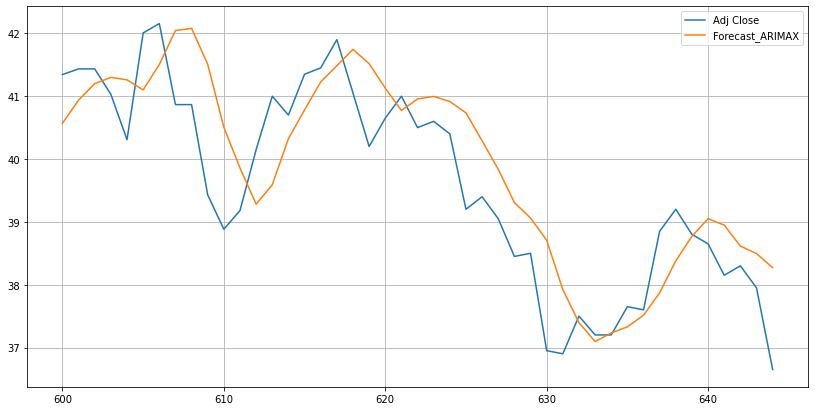

In [189]:
data4_valid[['Adj Close', 'Forecast_ARIMAX']].plot(figsize=(14,7))

In [198]:
model2= auto_arima(data4_train['Adj Close'], exogenous=data4_train[exogenous_features5], trace=True, error_action='ignore', suppress_warnings=True)
model2.fit(data4_train['Adj Close'], exogenous=data4_train[exogenous_features5])

forecast2= model2.predict(n_periods=data4_valid.shape[0], exogenous= data4_valid[exogenous_features5])
data4_valid["Forecast_ARIMAX2"]= forecast2


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=625.043, Time=4.86 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=864.651, Time=1.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=655.384, Time=2.63 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=684.660, Time=1.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=862.653, Time=2.28 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=631.938, Time=4.69 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=628.769, Time=3.40 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=626.700, Time=5.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=634.349, Time=4.62 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=642.285, Time=3.01 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=632.797, Time=4.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=624.350, Time=5.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=622.095, Time=4.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=632.512, Time=3.02 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=622.8

C:\Users\MAINGATE\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

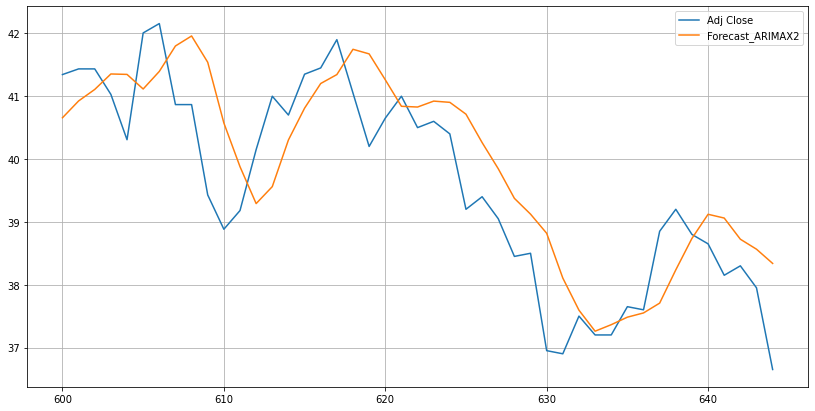

In [199]:
data4_valid[['Adj Close', 'Forecast_ARIMAX2']].plot(figsize=(14,7))

In [203]:
data4_valid[['Adj Close', 'Forecast_ARIMAX2', 'Forecast_ARIMAX']]

Adj Close  Forecast_ARIMAX2  Forecast_ARIMAX
600  41.344353         40.656636        40.568581
601  41.434528         40.924313        40.938013
602  41.434528         41.107699        41.199858
603  41.028748         41.353819        41.300260
604  40.307362         41.346963        41.259450
605  42.007122         41.114659        41.100413
606  42.155910         41.394394        41.504303
607  40.866436         41.799380        42.044885
608  40.866436         41.958719        42.079654
609  39.428177         41.539948        41.505006
610  38.882629         40.573804        40.504264
611  39.180199         39.878148        39.857220
612  40.150002         39.290769        39.281374
613  41.000000         39.560816        39.590837
614  40.700001         40.303556        40.323947
615  41.349998         40.809235        40.781934
616  41.450001         41.201996        41.227139
617  41.900002         41.344146        41.484029
618  41.049999         41.746603        41.745980
619  40.200001         41.673442        41.517379
620  40.650002         41.261564        41.128701
621  41.000000         40.839355        40.772756
622  40.500000         40.827576        40.955784
623  40.599998         40.921857        40.996202
624  40.400002         40.902281        40.915749
625  39.200001         40.713802        40.734690
626  39.400002         40.262019        40.289329
627  39.049999         39.845565        39.835509
628  38.450001         39.374261        39.306857
629  38.500000         39.122766        39.060308
630  36.950001         38.818145        38.707526
631  36.900002         38.105370        37.921499
632  37.500000         37.594223        37.396194
633  37.200001         37.259695        37.094873
634  37.200001         37.363437        37.231252
635  37.650002         37.482924        37.328985
636  37.599998         37.550275        37.513981
637  38.849998         37.706680        37.870740
638  39.200001         38.235865        38.379253
639  38.799999         38.736547        38.770269
640  38.650002         39.120586        39.049239
641  38.150002         39.060557        38.948508
642  38.299999         38.723590        38.614576
643  37.950001         38.564804        38.495776
644  36.650002         38.338456        38.270597

In [201]:
data4_valid

Adj Close  OPEC_price  Ukraine_crisis       Date  Adj Close_mean_lag3  \
600  41.344353  105.315000               1 2022-05-08            39.856496   
601  41.434528  108.840000               1 2022-05-09            40.607939   
602  41.434528  110.230000               1 2022-05-10            41.088863   
603  41.028748  109.793333               1 2022-05-11            41.404470   
604  40.307362  108.733333               1 2022-05-12            41.299268   
605  42.007122  109.060000               1 2022-05-15            40.923546   
606  42.155910  111.090000               1 2022-05-16            41.114411   
607  40.866436  115.040000               1 2022-05-17            41.490131   
608  40.866436  114.973333               1 2022-05-18            41.676489   
609  39.428177  114.626667               1 2022-05-19            41.296261   
610  38.882629  113.390000               1 2022-05-22            40.387016   
611  39.180199  113.945000               1 2022-05-23            39.725747   
612  40.150002  115.455000               1 2022-05-24            39.163668   
613  41.000000  115.580000               1 2022-05-25            39.404277   
614  40.700001  115.763333               1 2022-05-26            40.110067   
615  41.349998  116.165000               1 2022-05-29            40.616668   
616  41.450001  118.255000               1 2022-05-30            41.016666   
617  41.900002  121.475000               1 2022-05-31            41.166667   
618  41.049999  120.006667               1 2022-06-01            41.566667   
619  40.200001  118.210000               1 2022-06-02            41.466667   
620  40.650002  115.845000               1 2022-06-05            41.050001   
621  41.000000  117.235000               1 2022-06-06            40.633334   
622  40.500000  120.005000               1 2022-06-07            40.616668   
623  40.599998  120.516667               1 2022-06-08            40.716667   
624  40.400002  121.636667               1 2022-06-09            40.699999   
625  39.200001  122.375000               1 2022-06-12            40.500000   
626  39.400002  121.935000               1 2022-06-13            40.066667   
627  39.049999  122.195000               1 2022-06-14            39.666668   
628  38.450001  121.820000               1 2022-06-15            39.216667   
629  38.500000  121.346667               1 2022-06-16            38.966667   
630  36.950001  120.155000               1 2022-06-19            38.666667   
631  36.900002  116.315000               1 2022-06-20            37.966667   
632  37.500000  114.680000               1 2022-06-21            37.450001   
633  37.200001  113.453333               1 2022-06-22            37.116668   
634  37.200001  112.686667               1 2022-06-23            37.200001   
635  37.650002  111.045000               1 2022-06-26            37.300001   
636  37.599998  112.985000               1 2022-06-27            37.350001   
637  38.849998  116.215000               1 2022-06-28            37.483334   
638  39.200001  116.686667               1 2022-06-29            38.033333   
639  38.799999  116.926667               1 2022-06-30            38.549999   
640  38.650002  116.615000               1 2022-07-03            38.949999   
641  38.150002  115.450000               1 2022-07-04            38.883334   
642  38.299999  114.800000               1 2022-07-05            38.533334   
643  37.950001  114.800000               1 2022-07-06            38.366668   
644  36.650002  114.300000               1 2022-07-13            38.133334   

     Adj Close_mean_lag7  Adj Close_mean_lag21  Adj Close_std_lag3  \
600            39.276812             38.853857            0.708592   
601            39.592418             38.971941            0.684267   
602            39.972433             39.102907            0.522564   
603            40.352449             39.233873            0.052063   
604            40.687378             39.341222            0.234277